<a href="https://colab.research.google.com/github/CptK1ng/dmc2019/blob/alexander_dev/notebooks/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc -q --show-progress https://www.dropbox.com/s/6m8iq9ogpzmu7vx/train_new.csv?dl=1 -O train_new.csv
!wget -nc -q --show-progress https://www.dropbox.com/s/tjpkc45oqn3uv8s/val_new.csv?dl=1 -O val_new.csv
!wget -nc -q --show-progress https://www.dropbox.com/s/hbd6nzgwlnevu4x/test.csv?dl=1 -O test.csv

train_new.csv       100%[===================>] 104.09K  --.-KB/s    in 0.01s   
val_new.csv         100%[===================>]  25.96K  --.-KB/s    in 0s      
test.csv            100%[===================>]  32.04M  42.9MB/s    in 0.7s    


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
#from scripts.utils import *


In [3]:
%run utils.ipynb

ERROR:root:File `'utils.ipynb.py'` not found.


In [5]:
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
df_train = pd.read_csv("train_new.csv", sep="|")
df_test = pd.read_csv("test.csv", sep="|")
df_train.head(2)

trustLevel  totalScanTimeInSeconds  ...  lineItemVoidsPerPosition  fraud
0           4                     828  ...                  1.166667      0
1           1                    1612  ...                  0.142857      0

[2 rows x 10 columns]

In [0]:
scaler = StandardScaler()
scaler.fit(df_train)


def prepareData(df):
  df = df.copy()
  df['totalScannedLineItems'] = df['scannedLineItemsPerSecond'] * df['totalScanTimeInSeconds'] #nur of scanned products
  return df

df_train = prepareData(df_train)


In [13]:
df_train.describe().T

count        mean  ...          75%          max
trustLevel                 1503.0    3.410512  ...     5.000000     6.000000
totalScanTimeInSeconds     1503.0  938.764471  ...  1396.500000  1831.000000
grandTotal                 1503.0   50.566826  ...    77.285000    99.960000
lineItemVoids              1503.0    5.496341  ...     8.000000    11.000000
scansWithoutRegistration   1503.0    4.922821  ...     8.000000    10.000000
quantityModifications      1503.0    2.510313  ...     4.000000     5.000000
scannedLineItemsPerSecond  1503.0    0.059945  ...     0.030891     6.666667
valuePerSecond             1503.0    0.218172  ...     0.105250    37.870000
lineItemVoidsPerPosition   1503.0    0.758422  ...     0.700000    11.000000
fraud                      1503.0    0.053892  ...     0.000000     1.000000
totalLineItems             1503.0   15.289421  ...    23.000000    30.000000
totalScannedLineItems      1503.0   15.289421  ...    23.000000    30.000000

[12 rows x 8 columns]

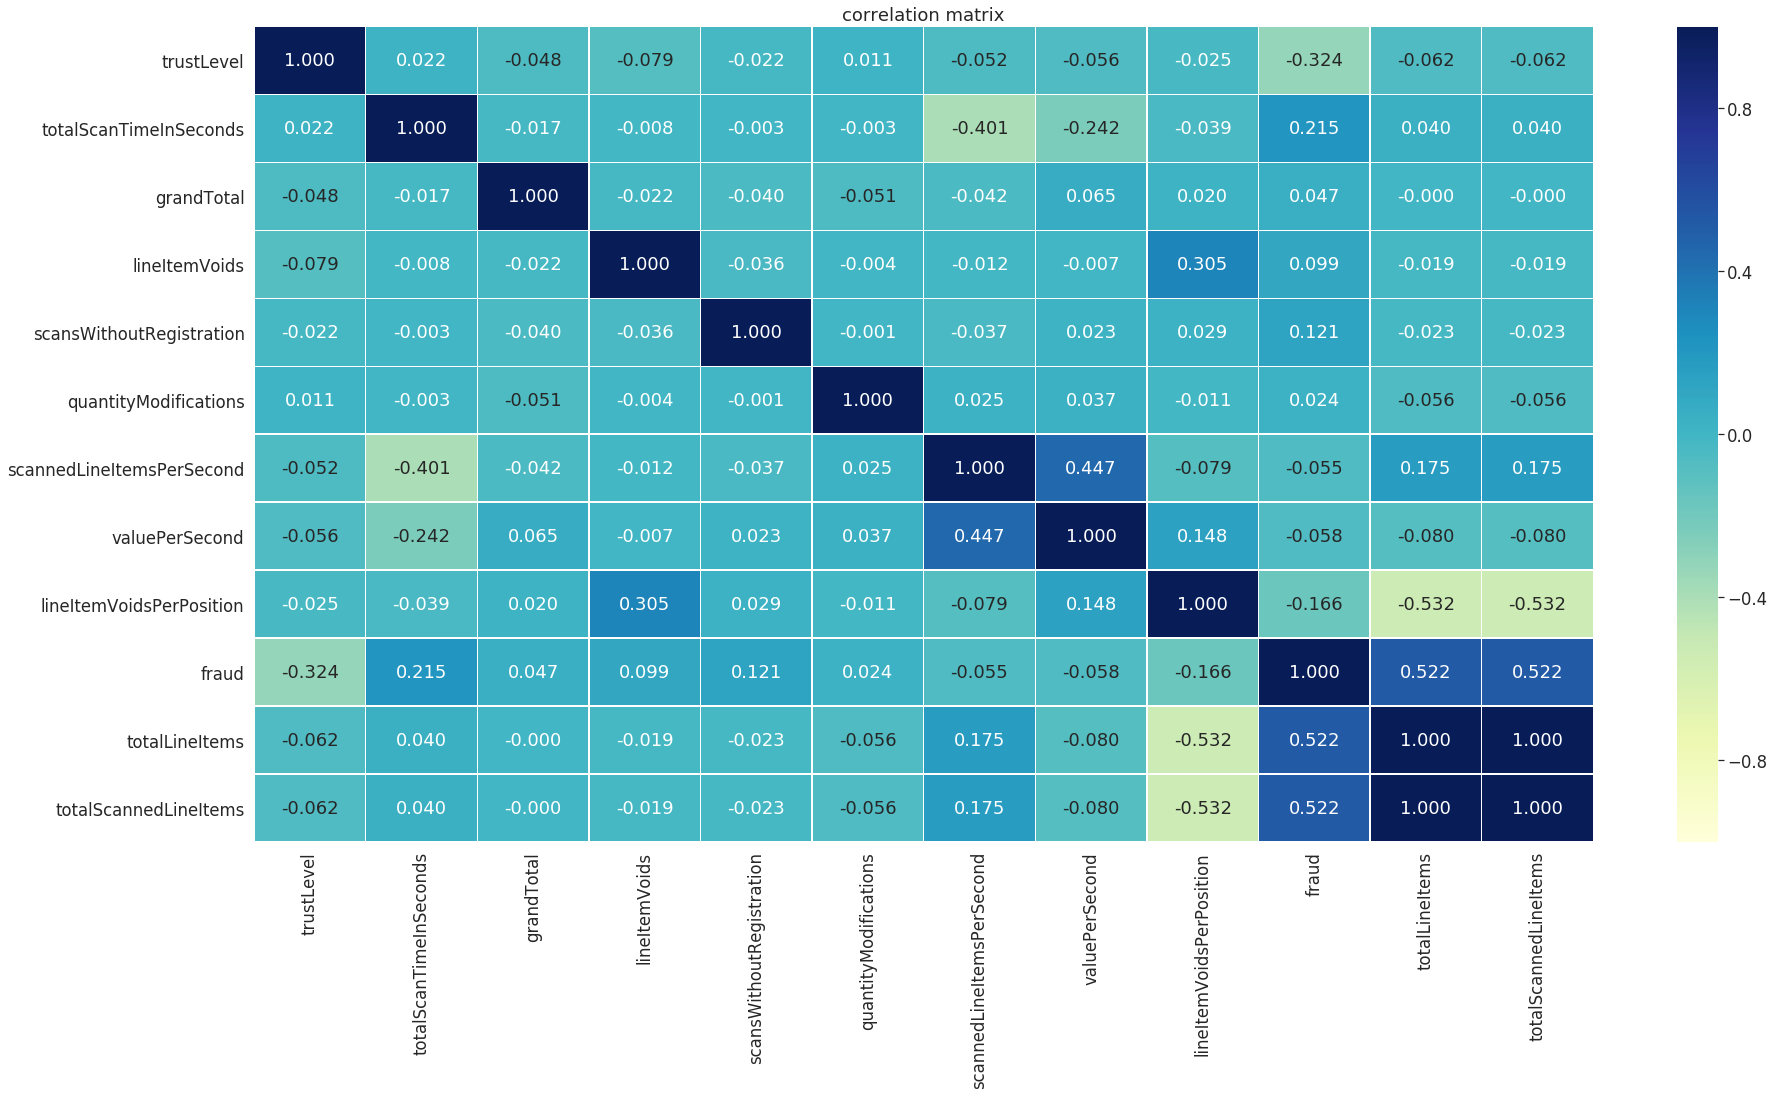

In [14]:
f,ax = plt.subplots(figsize=(30, 15))
sns.heatmap(df_train[df_train.trustLevel <= 2].corr(), annot=True, linewidths=.5, fmt= '.3f',vmin=-1, vmax=1, cmap="YlGnBu", ax=ax)
plt.title("correlation matrix")
plt.show()

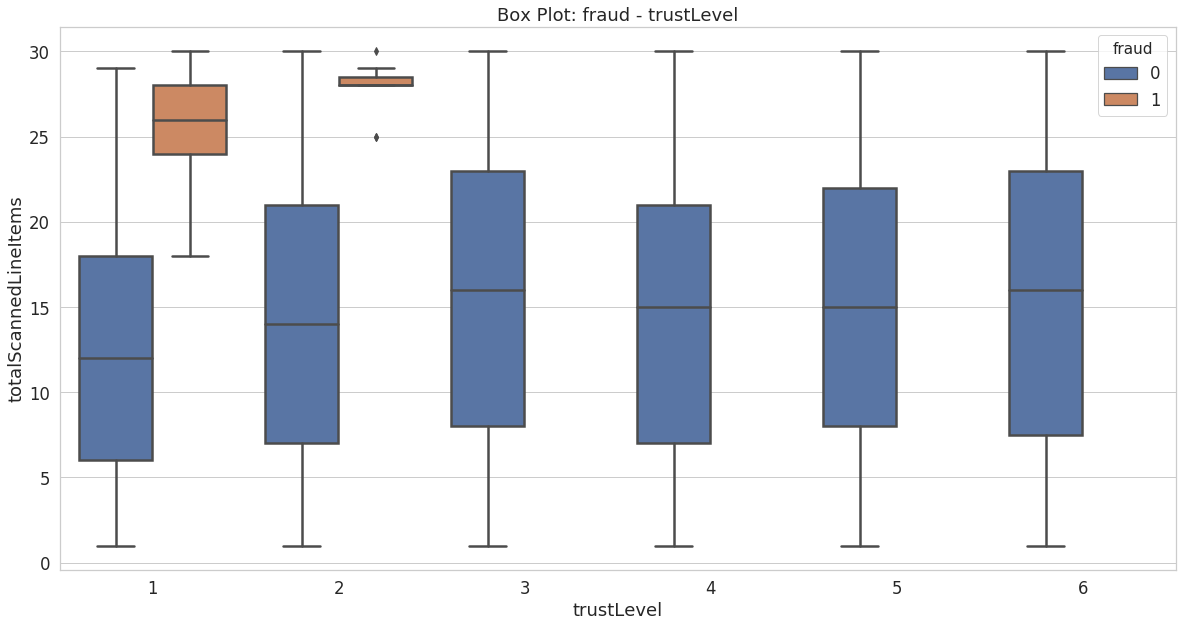

In [15]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(x="trustLevel", y='totalScannedLineItems',hue='fraud', data=df_train)
plt.title("Box Plot: fraud - trustLevel")
plt.show()

In [16]:
df_train.head()

trustLevel  totalScanTimeInSeconds  ...  totalLineItems  totalScannedLineItems
0           4                     828  ...             6.0                    6.0
1           1                    1612  ...            14.0                   14.0
2           3                     848  ...            19.0                   19.0
3           1                     321  ...            23.0                   23.0
4           1                     660  ...            18.0                   18.0

[5 rows x 12 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


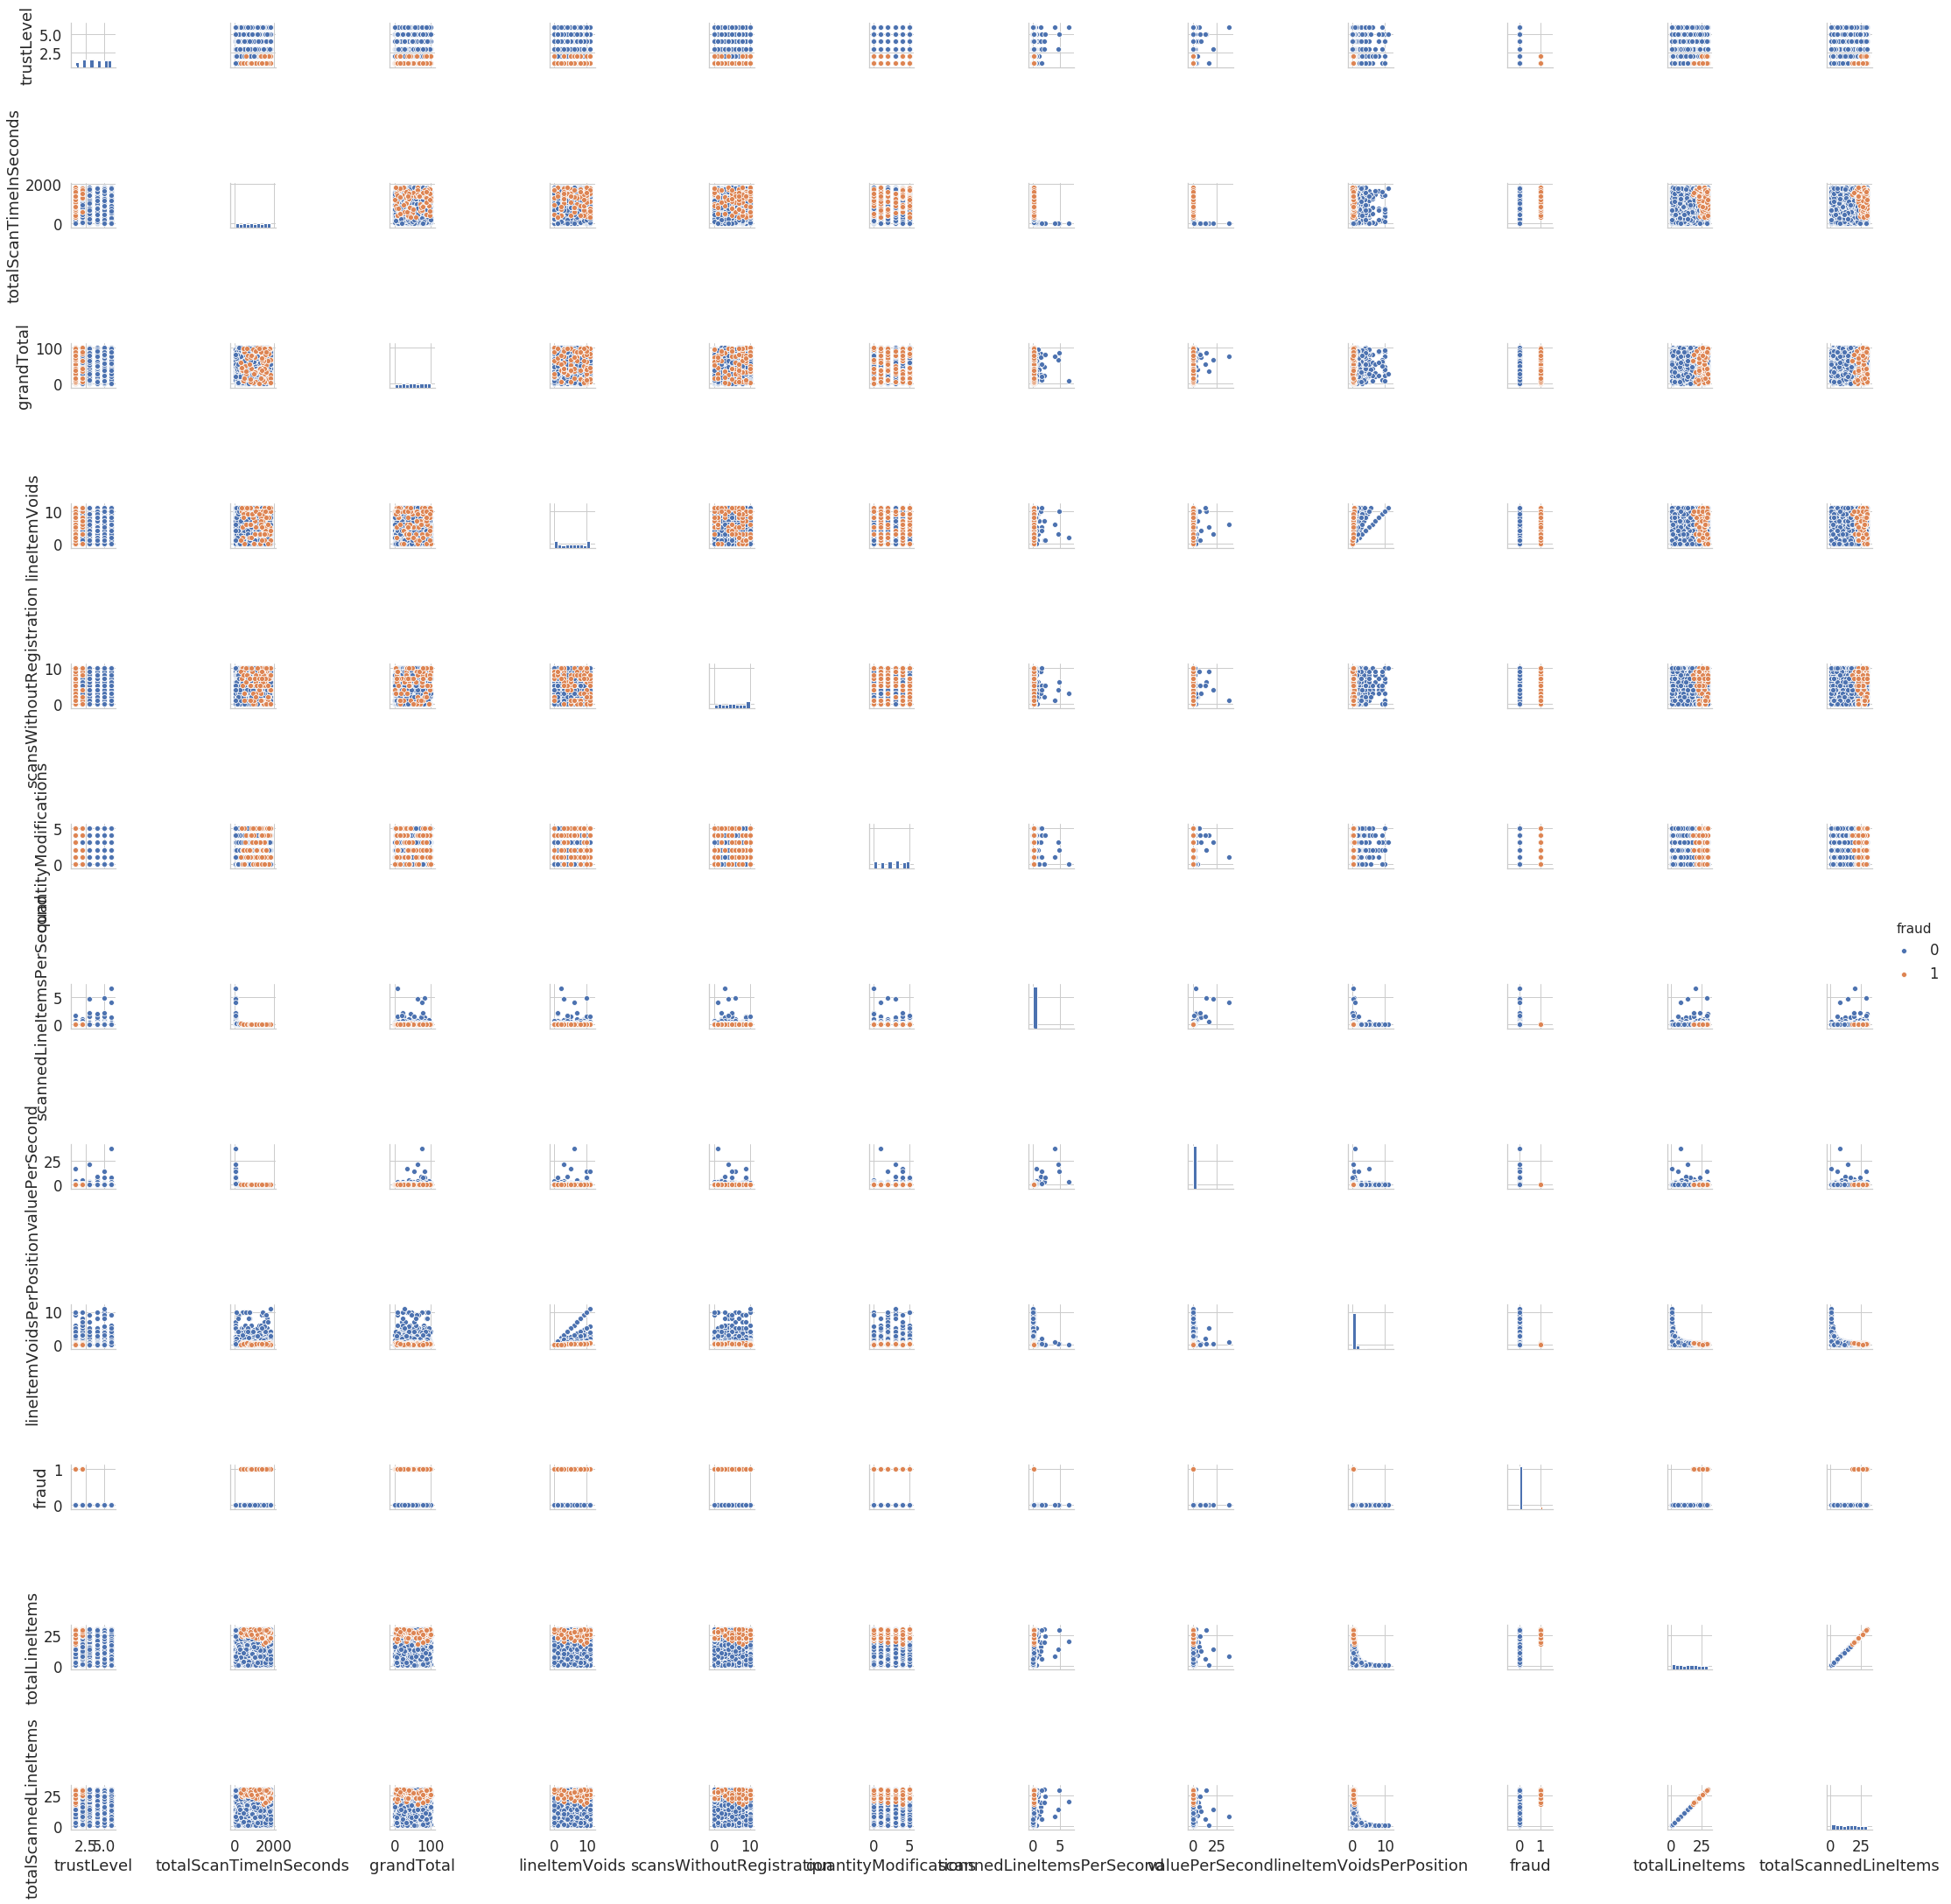

In [17]:
sns_plot =sns.pairplot(df_train, diag_kind='hist', hue='fraud',size=2.5)

In [0]:
sns_plot.savefig("output.png")

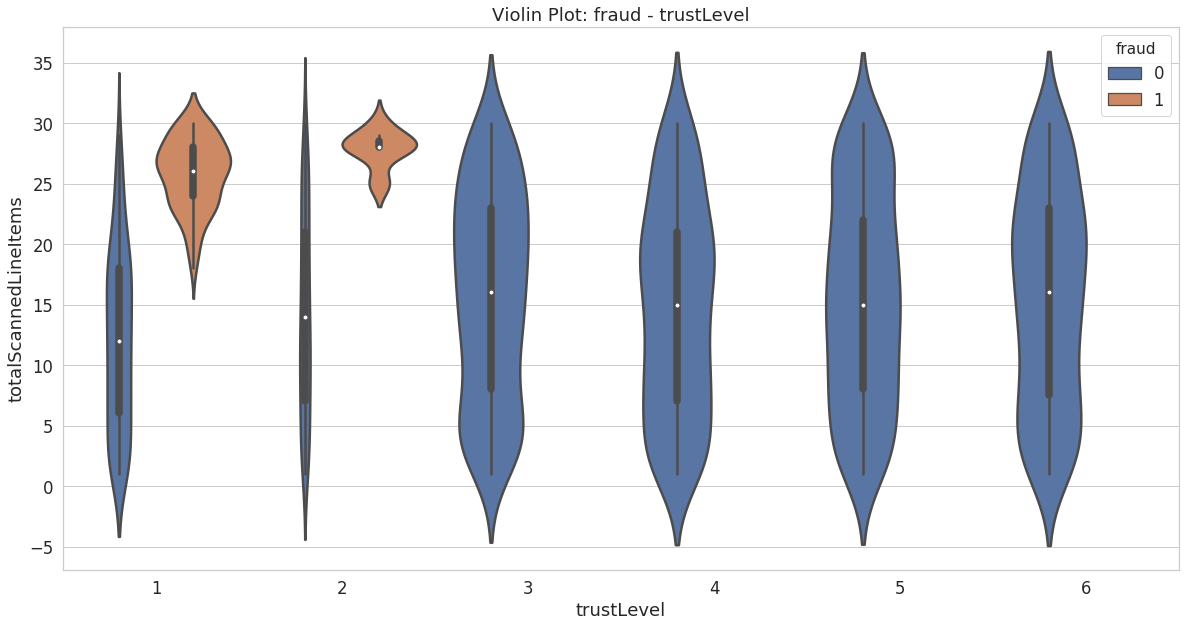

In [19]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.violinplot(x="trustLevel", y='totalScannedLineItems',hue='fraud', data=df_train)
plt.title("Violin Plot: fraud - trustLevel")
plt.show()

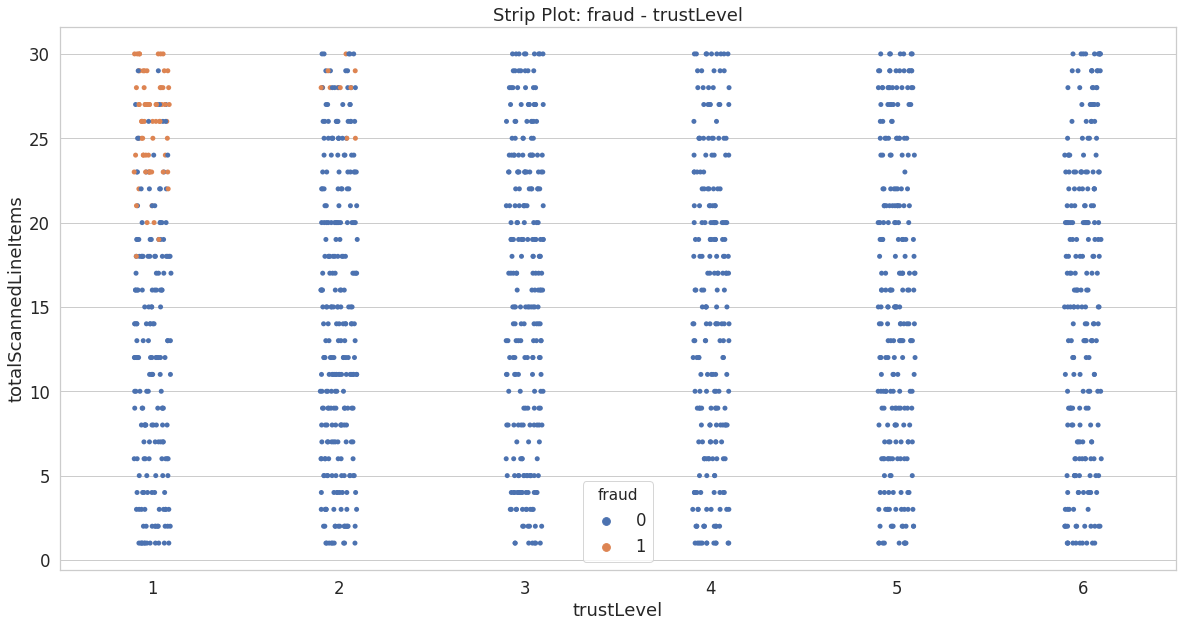

In [20]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.stripplot(x="trustLevel", y='totalScannedLineItems',hue='fraud', data=df_train)
plt.title("Strip Plot: fraud - trustLevel")
plt.show()

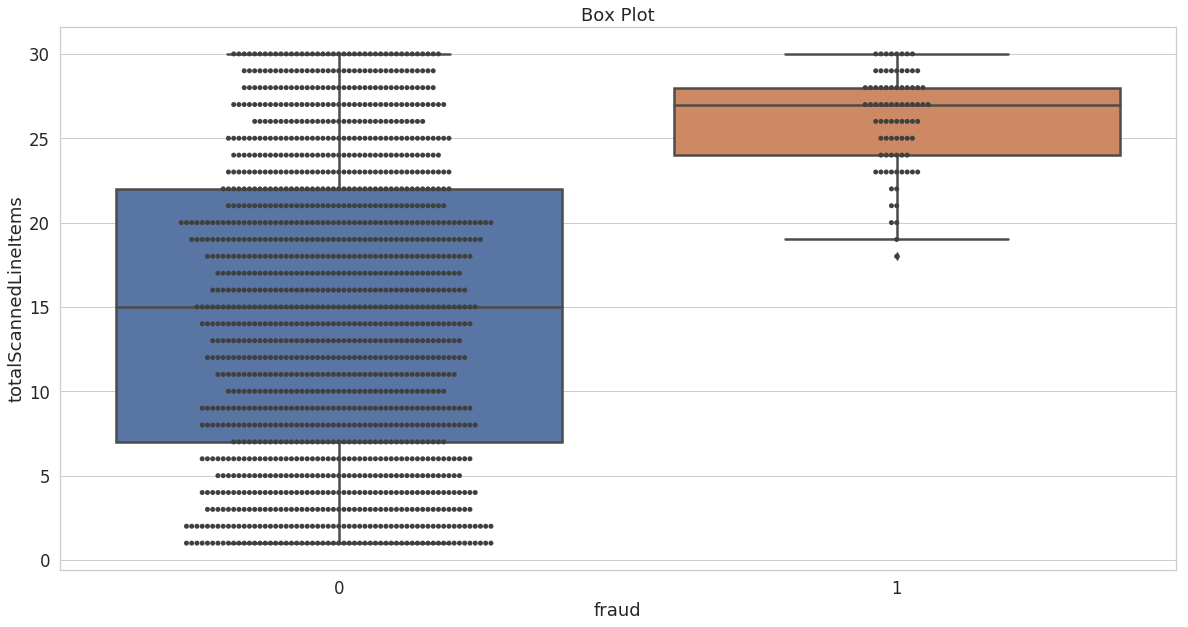

In [21]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(x="fraud", y='totalScannedLineItems', data=df_train)
ax = sns.swarmplot(x="fraud", y="totalScannedLineItems", data=df_train, color=".25")
plt.title("Box Plot")
plt.show()

## Plotting Box-Plots for each feature

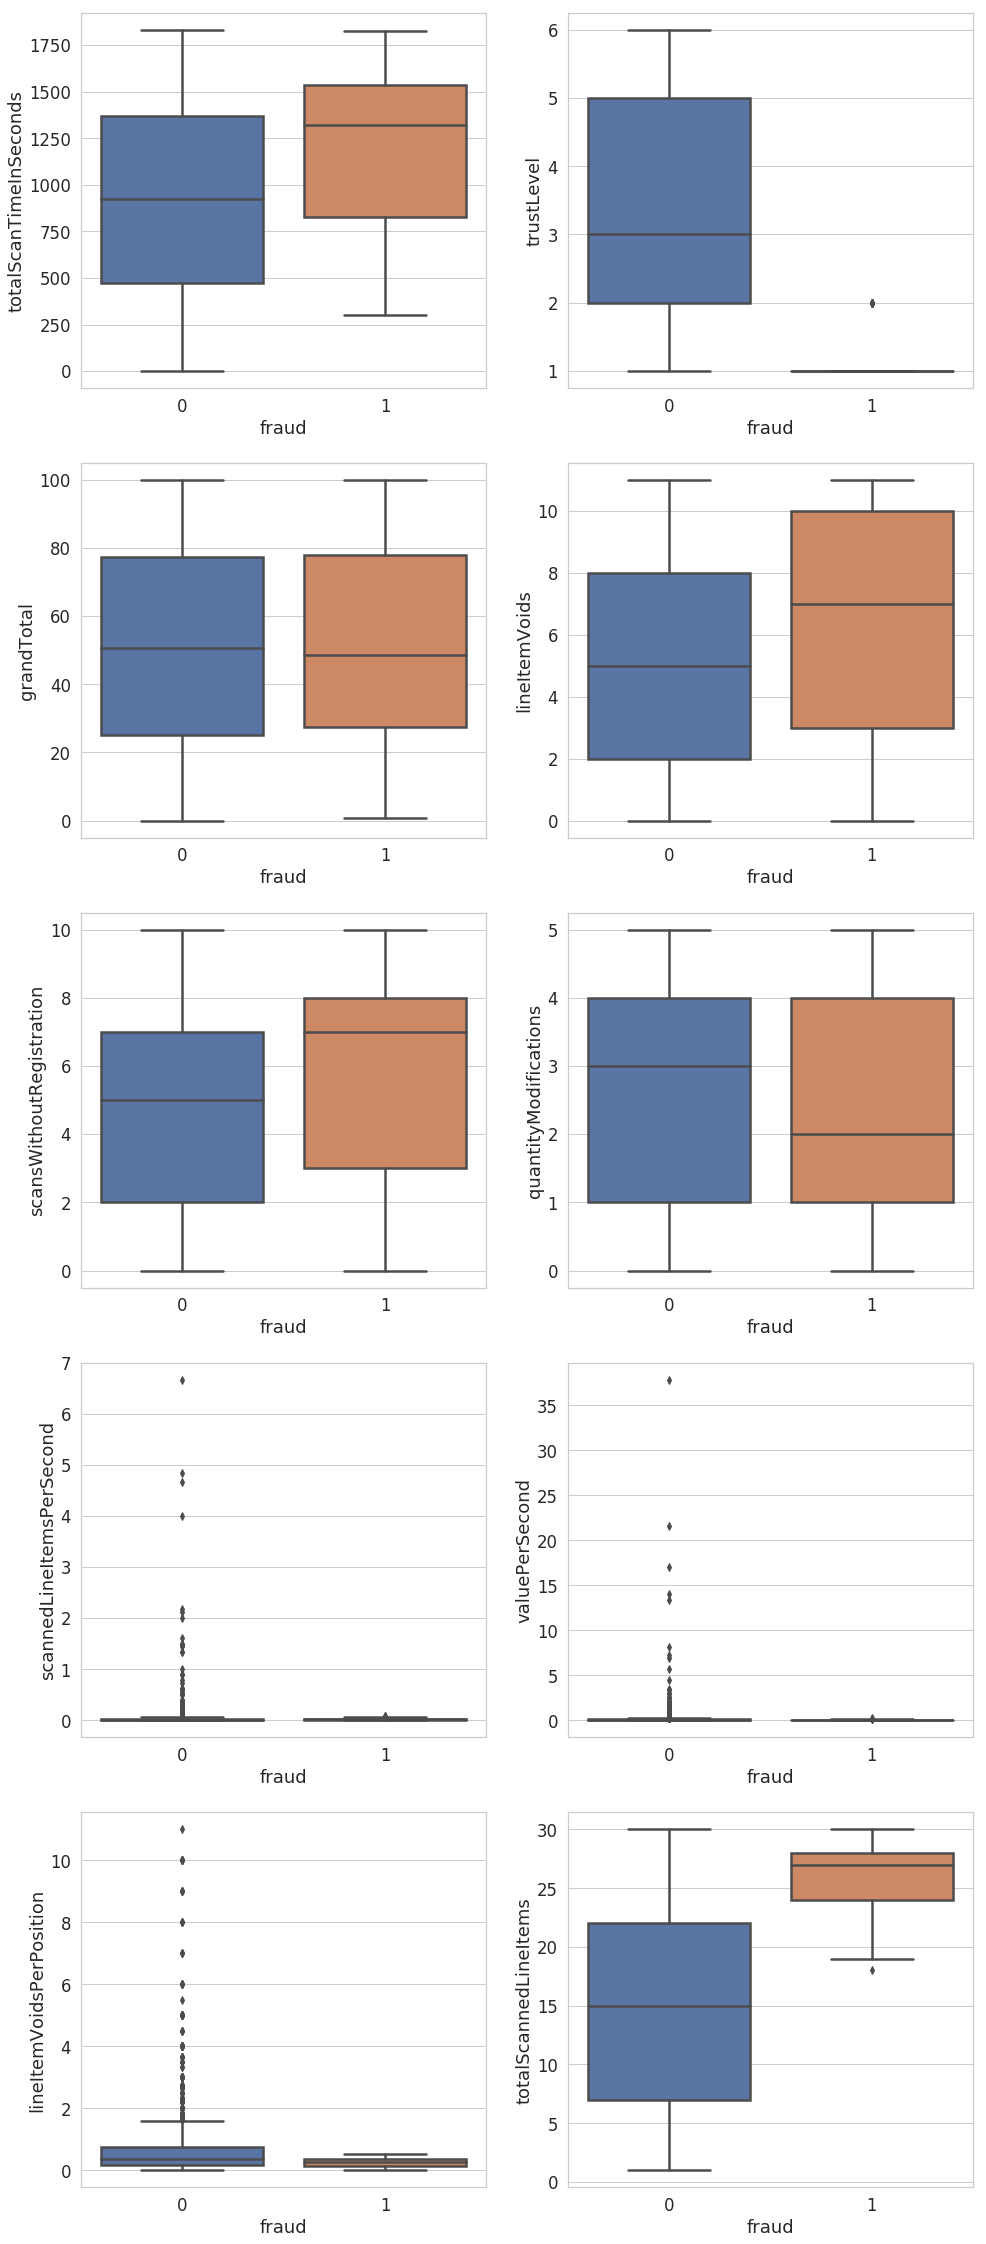

In [22]:
fig, axs = plt.subplots(ncols=2, nrows=5,figsize=(16, 40))

n_fraud_color = sns.xkcd_rgb["medium green"]
fraud_color = sns.xkcd_rgb["pale red"]
#sns.plt.show()
sns.boxplot(x="fraud", y='totalScanTimeInSeconds', data=df_train, ax=axs[0][0])

sns.boxplot(x="fraud", y='trustLevel', data=df_train,ax=axs[0][1])

sns.boxplot(x="fraud", y='grandTotal', data=df_train, ax=axs[1][0])

sns.boxplot(x="fraud", y='lineItemVoids', data=df_train, ax=axs[1][1])

sns.boxplot(x="fraud", y='scansWithoutRegistration', data=df_train, ax=axs[2][0])

sns.boxplot(x="fraud", y='quantityModifications', data=df_train, ax=axs[2][1])

sns.boxplot(x="fraud", y='scannedLineItemsPerSecond', data=df_train, ax=axs[3][0])

sns.boxplot(x="fraud", y='valuePerSecond', data=df_train, ax=axs[3][1])

sns.boxplot(x="fraud", y='lineItemVoidsPerPosition', data=df_train, ax=axs[4][0])

sns.boxplot(x="fraud", y='totalScannedLineItems', data=df_train, ax=axs[4][1])


## Plotting Frauds and Non Frauds seperately with histrograms

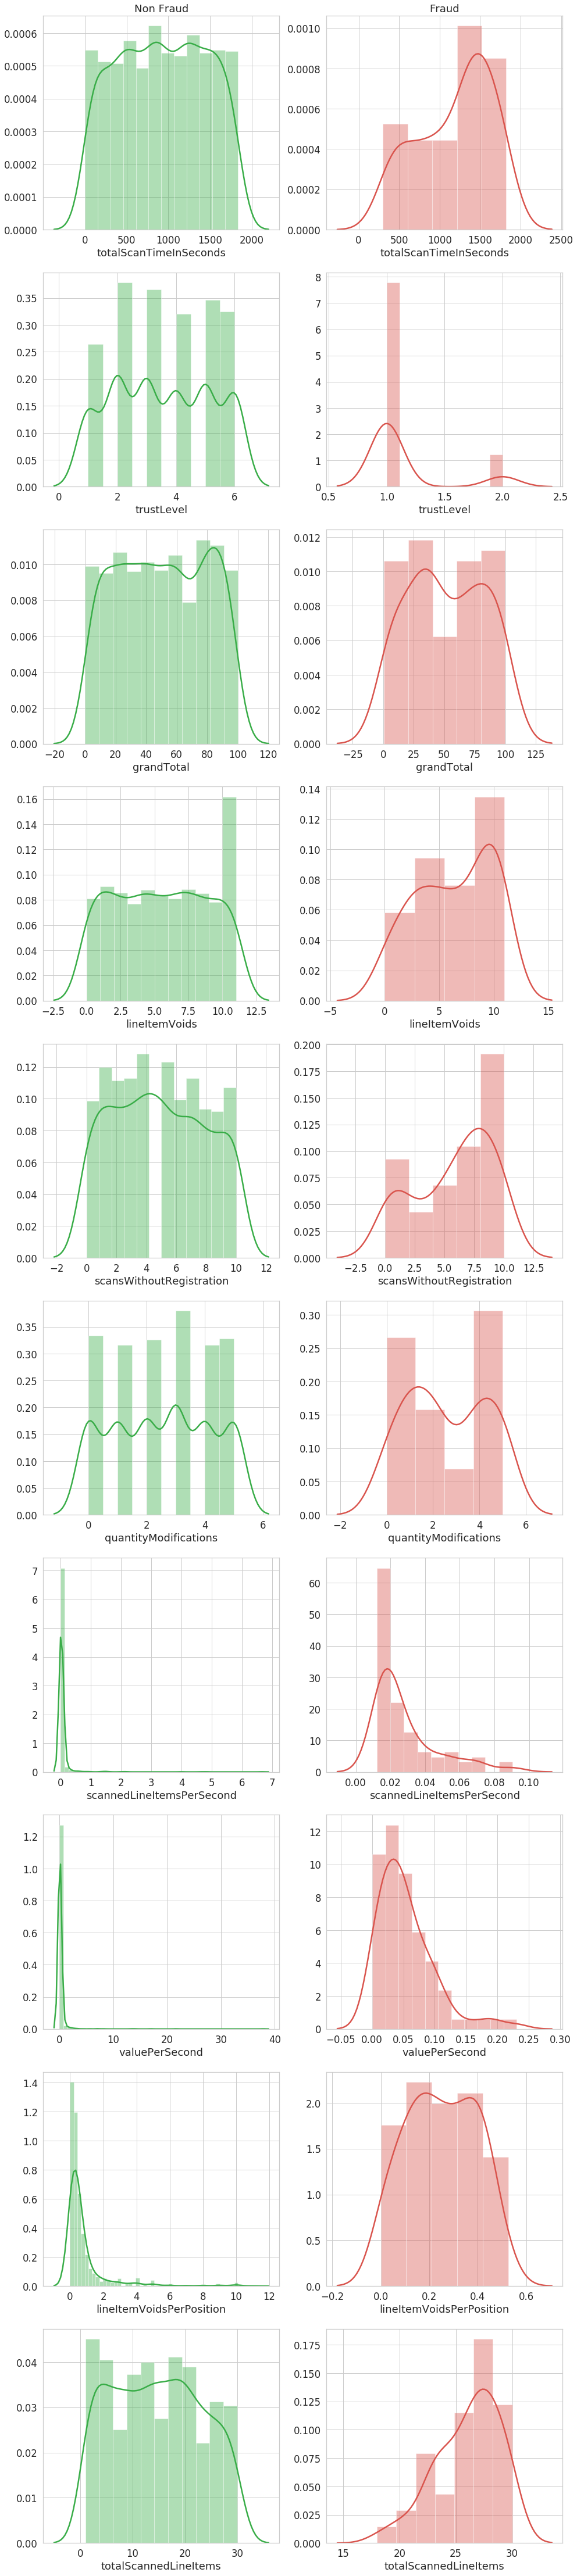

In [23]:
fig, axs = plt.subplots(ncols=2, nrows=10,figsize=(16, 80))
for ax, col in zip(axs[0], ["Non Fraud", "Fraud"]):
    ax.set_title(col)
n_fraud_color = sns.xkcd_rgb["medium green"]
fraud_color = sns.xkcd_rgb["pale red"]
sns.distplot(df_train.totalScanTimeInSeconds[df_train.fraud == 0], ax=axs[0][0],color=n_fraud_color)
sns.distplot(df_train.totalScanTimeInSeconds[df_train.fraud == 1],ax=axs[0][1], color=fraud_color)

sns.distplot(df_train.trustLevel[df_train.fraud == 0],ax=axs[1][0],color=n_fraud_color)
sns.distplot(df_train.trustLevel[df_train.fraud == 1],ax=axs[1][1], color=fraud_color)

sns.distplot(df_train.grandTotal[df_train.fraud == 0], ax=axs[2][0],color=n_fraud_color)
sns.distplot(df_train.grandTotal[df_train.fraud == 1],ax=axs[2][1], color=fraud_color)

sns.distplot(df_train.lineItemVoids[df_train.fraud == 0],ax=axs[3][0],color=n_fraud_color)
sns.distplot(df_train.lineItemVoids[df_train.fraud == 1],ax=axs[3][1], color=fraud_color)

sns.distplot(df_train.scansWithoutRegistration[df_train.fraud == 0], ax=axs[4][0],color=n_fraud_color)
sns.distplot(df_train.scansWithoutRegistration[df_train.fraud == 1],ax=axs[4][1], color=fraud_color)

sns.distplot(df_train.quantityModifications[df_train.fraud == 0],ax=axs[5][0],color=n_fraud_color)
sns.distplot(df_train.quantityModifications[df_train.fraud == 1],ax=axs[5][1], color=fraud_color)

sns.distplot(df_train.scannedLineItemsPerSecond[df_train.fraud == 0], ax=axs[6][0],color=n_fraud_color)
sns.distplot(df_train.scannedLineItemsPerSecond[df_train.fraud == 1],ax=axs[6][1], color=fraud_color)

sns.distplot(df_train.valuePerSecond[df_train.fraud == 0],ax=axs[7][0],color=n_fraud_color)
sns.distplot(df_train.valuePerSecond[df_train.fraud == 1],ax=axs[7][1], color=fraud_color)

sns.distplot(df_train.lineItemVoidsPerPosition[df_train.fraud == 0],ax=axs[8][0],color=n_fraud_color)
sns.distplot(df_train.lineItemVoidsPerPosition[df_train.fraud == 1],ax=axs[8][1], color=fraud_color)

sns.distplot(df_train.totalScannedLineItems[df_train.fraud == 0], ax=axs[9][0],color=n_fraud_color)
sns.distplot(df_train.totalScannedLineItems[df_train.fraud == 1],ax=axs[9][1], color=fraud_color)


## Plotting distribution of frauds and non frauds in one graphic

NameError: ignored

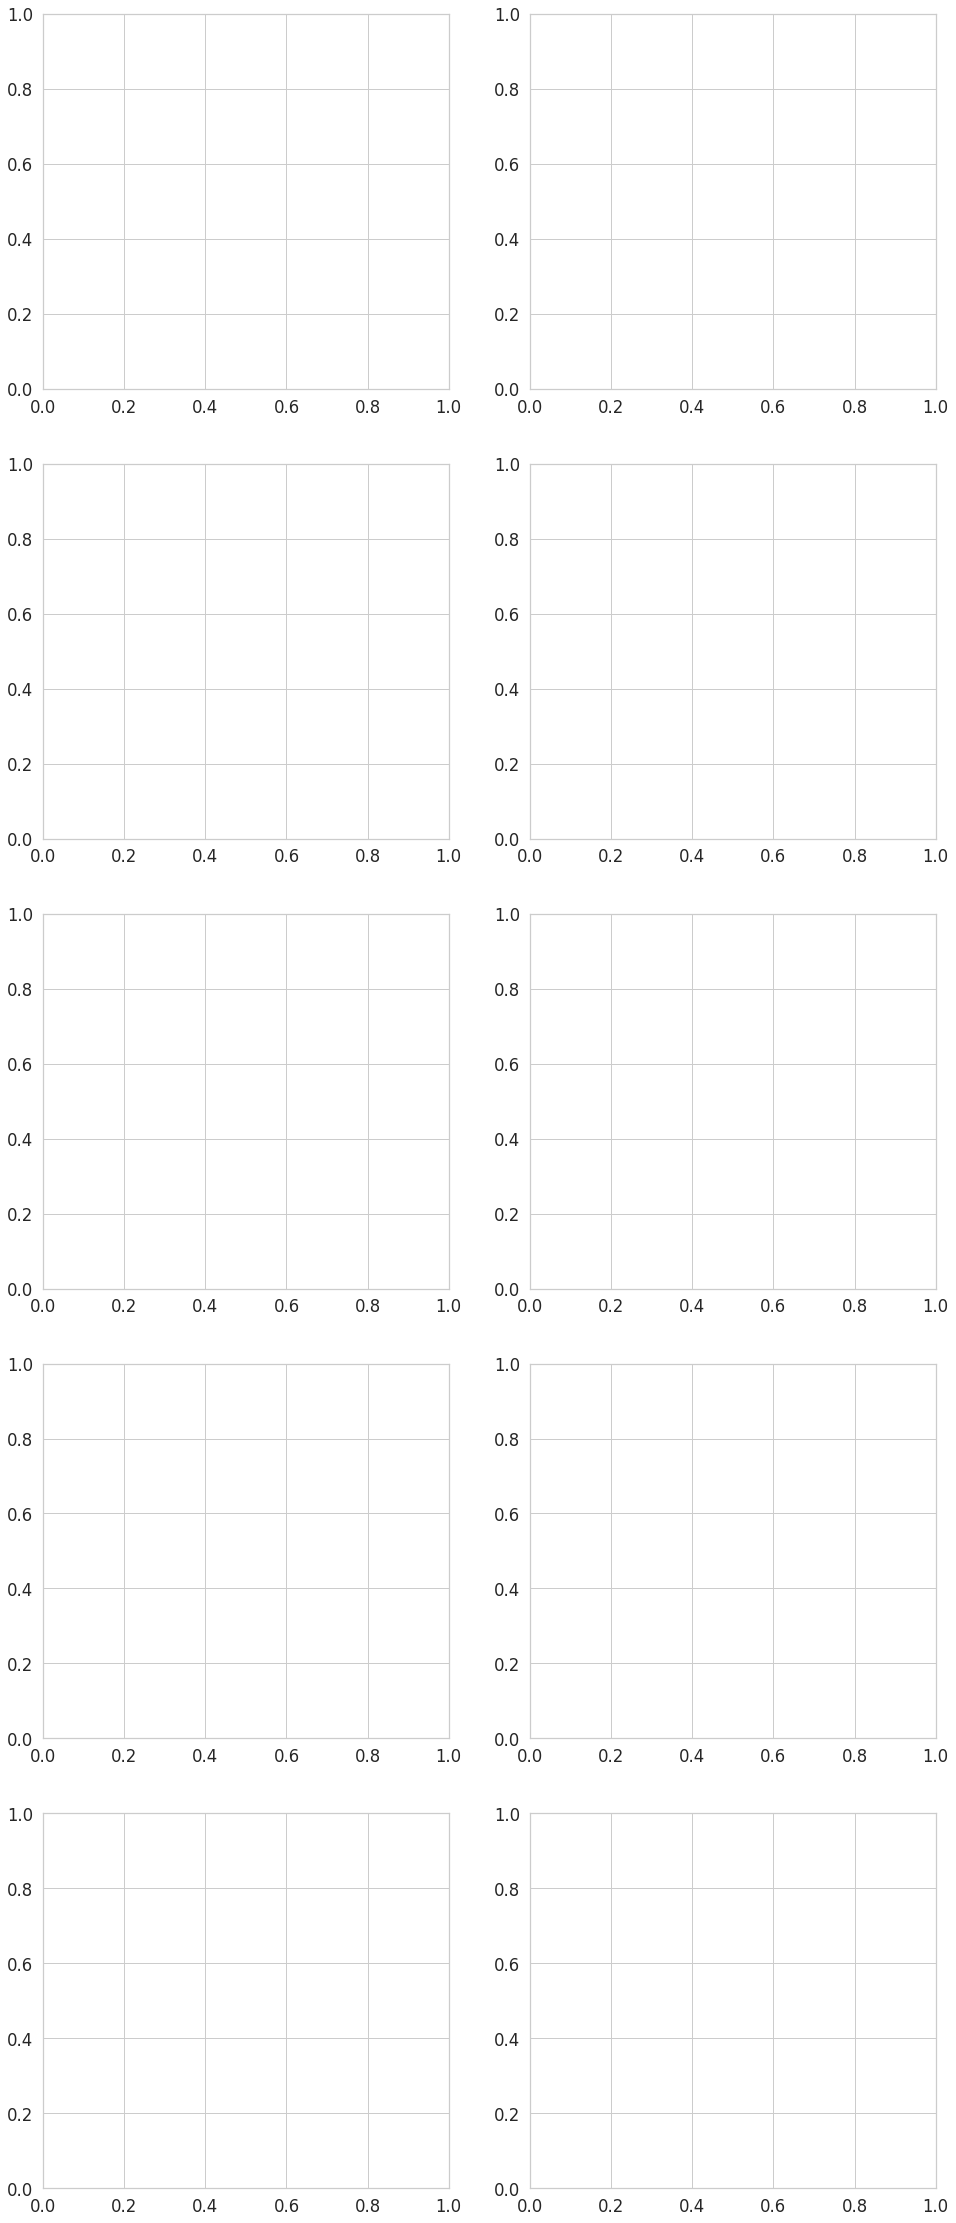

In [24]:
#fig, axs = plt.subplots(ncols=2, nrows=10,figsize=(20, 100))
fig, axs = plt.subplots(ncols=2, nrows=5,figsize=(16, 40))

n_fraud_color = sns.xkcd_rgb["medium green"]
fraud_color = sns.xkcd_rgb["pale red"]
#sns.plt.show()
sns.distplot(df_test_pl.totalScanTimeInSeconds[df_test_pl.fraud == 0], color=n_fraud_color,hist=True,ax=axs[0][0])
sns.distplot(df_test_pl.totalScanTimeInSeconds[df_test_pl.fraud == 1], color=fraud_color,hist=True,ax=axs[0][0])

sns.distplot(df_test_pl.trustLevel[df_test_pl.fraud == 0],color=n_fraud_color,hist=True,ax=axs[0][1])
sns.distplot(df_test_pl.trustLevel[df_test_pl.fraud == 1], color=fraud_color,hist=True,ax=axs[0][1])

sns.distplot(df_test_pl.grandTotal[df_test_pl.fraud == 0], color=n_fraud_color,hist=True,ax=axs[1][0])
sns.distplot(df_test_pl.grandTotal[df_test_pl.fraud == 1], color=fraud_color,hist=True,ax=axs[1][0])

sns.distplot(df_test_pl.lineItemVoids[df_test_pl.fraud == 0],color=n_fraud_color,hist=True,ax=axs[1][1])
sns.distplot(df_test_pl.lineItemVoids[df_test_pl.fraud == 1], color=fraud_color,hist=True,ax=axs[1][1])

sns.distplot(df_test_pl.scansWithoutRegistration[df_test_pl.fraud == 0], color=n_fraud_color,hist=True,ax=axs[2][0])
sns.distplot(df_test_pl.scansWithoutRegistration[df_test_pl.fraud == 1], color=fraud_color,hist=True,ax=axs[2][0])

sns.distplot(df_test_pl.quantityModifications[df_test_pl.fraud == 0],color=n_fraud_color,hist=True,ax=axs[2][1])
sns.distplot(df_test_pl.quantityModifications[df_test_pl.fraud == 1], color=fraud_color,hist=True,ax=axs[2][1])

sns.distplot(df_test_pl.scannedLineItemsPerSecond[df_test_pl.fraud == 0],color=n_fraud_color,hist=True,ax=axs[3][0])
sns.distplot(df_test_pl.scannedLineItemsPerSecond[df_test_pl.fraud == 1], color=fraud_color,hist=True,ax=axs[3][0])

sns.distplot(df_test_pl.valuePerSecond[df_test_pl.fraud == 0],color=n_fraud_color,hist=True,ax=axs[3][1])
sns.distplot(df_test_pl.valuePerSecond[df_test_pl.fraud == 1], color=fraud_color,hist=True,ax=axs[3][1])

sns.distplot(df_test_pl.lineItemVoidsPerPosition[df_test_pl.fraud == 0],color=n_fraud_color,hist=True,ax=axs[4][0])
sns.distplot(df_test_pl.lineItemVoidsPerPosition[df_test_pl.fraud == 1], color=fraud_color,hist=True,ax=axs[4][0])

sns.distplot(df_test_pl.totalScannedLineItems[df_test_pl.fraud == 0],color=n_fraud_color,hist=True,ax=axs[4][1])
sns.distplot(df_test_pl.totalScannedLineItems[df_test_pl.fraud == 1], color=fraud_color,hist=True,ax=axs[4][1])

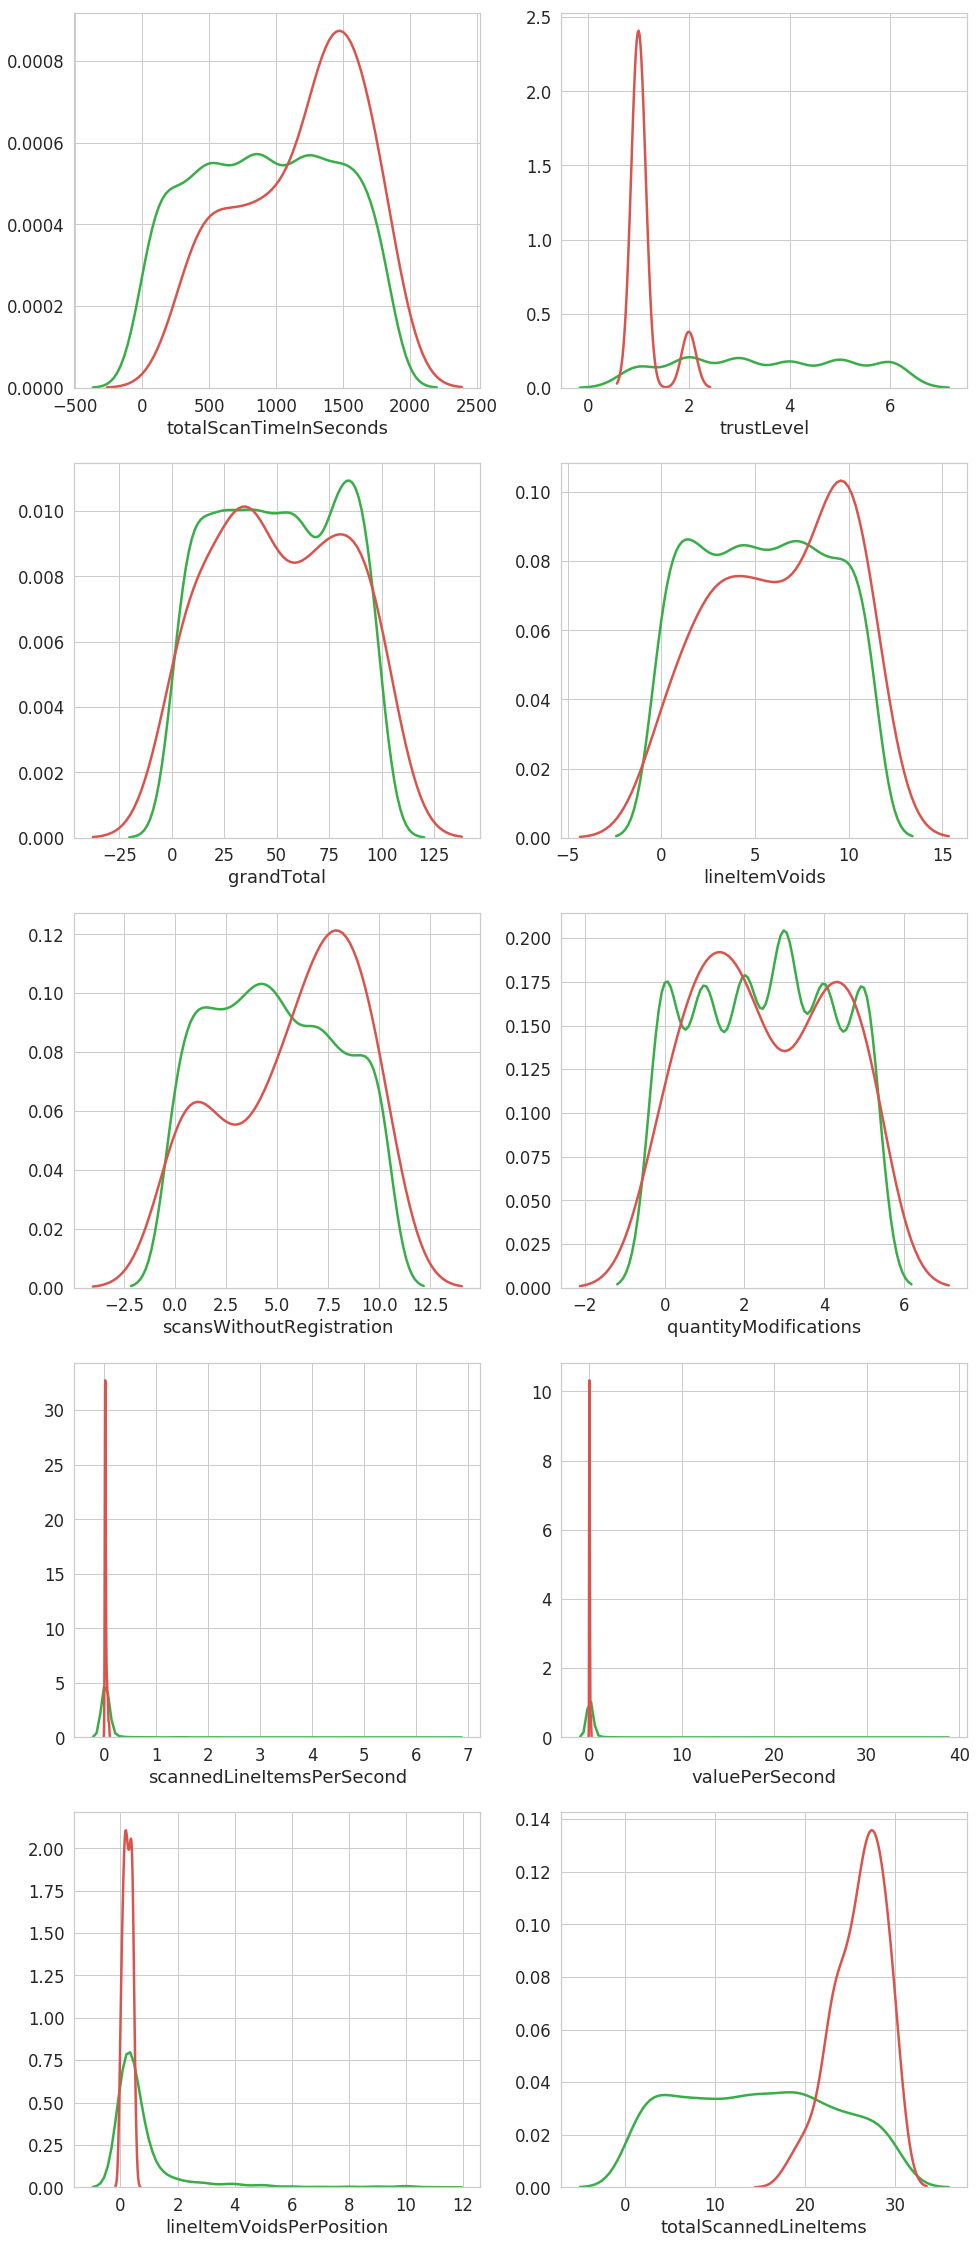

In [25]:
#fig, axs = plt.subplots(ncols=2, nrows=10,figsize=(20, 100))
fig, axs = plt.subplots(ncols=2, nrows=5,figsize=(16, 40))

n_fraud_color = sns.xkcd_rgb["medium green"]
fraud_color = sns.xkcd_rgb["pale red"]
#sns.plt.show()
sns.distplot(df_train.totalScanTimeInSeconds[df_train.fraud == 0], color=n_fraud_color,hist=False,ax=axs[0][0])
sns.distplot(df_train.totalScanTimeInSeconds[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[0][0])

sns.distplot(df_train.trustLevel[df_train.fraud == 0],color=n_fraud_color,hist=False,ax=axs[0][1])
sns.distplot(df_train.trustLevel[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[0][1])

sns.distplot(df_train.grandTotal[df_train.fraud == 0], color=n_fraud_color,hist=False,ax=axs[1][0])
sns.distplot(df_train.grandTotal[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[1][0])

sns.distplot(df_train.lineItemVoids[df_train.fraud == 0],color=n_fraud_color,hist=False,ax=axs[1][1])
sns.distplot(df_train.lineItemVoids[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[1][1])

sns.distplot(df_train.scansWithoutRegistration[df_train.fraud == 0], color=n_fraud_color,hist=False,ax=axs[2][0])
sns.distplot(df_train.scansWithoutRegistration[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[2][0])

sns.distplot(df_train.quantityModifications[df_train.fraud == 0],color=n_fraud_color,hist=False,ax=axs[2][1])
sns.distplot(df_train.quantityModifications[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[2][1])

sns.distplot(df_train.scannedLineItemsPerSecond[df_train.fraud == 0],color=n_fraud_color,hist=False,ax=axs[3][0])
sns.distplot(df_train.scannedLineItemsPerSecond[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[3][0])

sns.distplot(df_train.valuePerSecond[df_train.fraud == 0],color=n_fraud_color,hist=False,ax=axs[3][1])
sns.distplot(df_train.valuePerSecond[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[3][1])

sns.distplot(df_train.lineItemVoidsPerPosition[df_train.fraud == 0],color=n_fraud_color,hist=False,ax=axs[4][0])
sns.distplot(df_train.lineItemVoidsPerPosition[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[4][0])

sns.distplot(df_train.totalScannedLineItems[df_train.fraud == 0],color=n_fraud_color,hist=False,ax=axs[4][1])
sns.distplot(df_train.totalScannedLineItems[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[4][1])

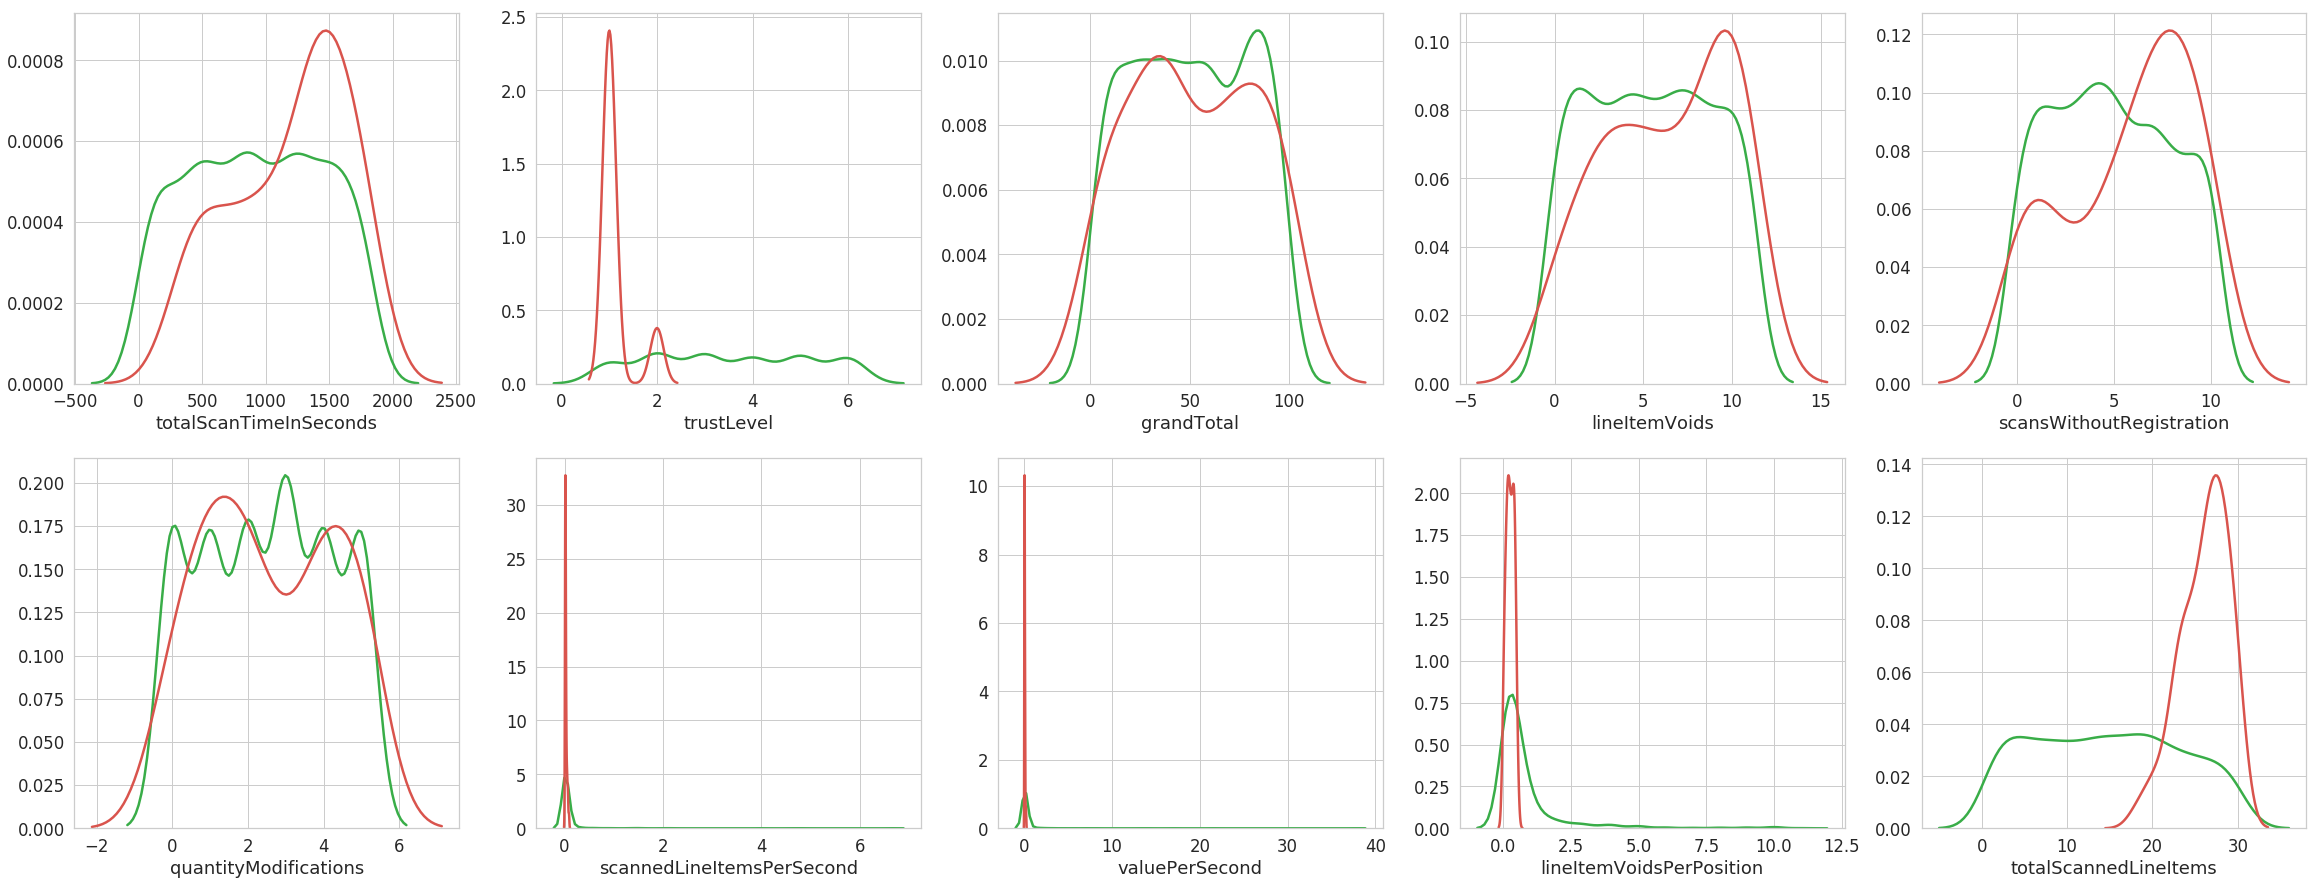

In [26]:
#fig, axs = plt.subplots(ncols=2, nrows=10,figsize=(20, 100))
fig, axs = plt.subplots(ncols=5, nrows=2,figsize=(40, 15))

n_fraud_color = sns.xkcd_rgb["medium green"]
fraud_color = sns.xkcd_rgb["pale red"]

#sns.plt.show()
sns.distplot(df_train.totalScanTimeInSeconds[df_train.fraud == 0], color=n_fraud_color,hist=False,ax=axs[0][0])
sns.distplot(df_train.totalScanTimeInSeconds[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[0][0])

sns.distplot(df_train.trustLevel[df_train.fraud == 0],color=n_fraud_color,hist=False,ax=axs[0][1])
sns.distplot(df_train.trustLevel[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[0][1])

sns.distplot(df_train.grandTotal[df_train.fraud == 0], color=n_fraud_color,hist=False,ax=axs[0][2])
sns.distplot(df_train.grandTotal[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[0][2])

sns.distplot(df_train.lineItemVoids[df_train.fraud == 0],color=n_fraud_color,hist=False,ax=axs[0][3])
sns.distplot(df_train.lineItemVoids[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[0][3])

sns.distplot(df_train.scansWithoutRegistration[df_train.fraud == 0], color=n_fraud_color,hist=False,ax=axs[0][4])
sns.distplot(df_train.scansWithoutRegistration[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[0][4])

sns.distplot(df_train.quantityModifications[df_train.fraud == 0],color=n_fraud_color,hist=False,ax=axs[1][0])
sns.distplot(df_train.quantityModifications[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[1][0])

sns.distplot(df_train.scannedLineItemsPerSecond[df_train.fraud == 0],color=n_fraud_color,hist=False,ax=axs[1][1])
sns.distplot(df_train.scannedLineItemsPerSecond[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[1][1])

sns.distplot(df_train.valuePerSecond[df_train.fraud == 0],color=n_fraud_color,hist=False,ax=axs[1][2])
sns.distplot(df_train.valuePerSecond[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[1][2])

sns.distplot(df_train.lineItemVoidsPerPosition[df_train.fraud == 0],color=n_fraud_color,hist=False,ax=axs[1][3])
sns.distplot(df_train.lineItemVoidsPerPosition[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[1][3])

sns.distplot(df_train.totalScannedLineItems[df_train.fraud == 0],color=n_fraud_color,hist=False,ax=axs[1][4])
sns.distplot(df_train.totalScannedLineItems[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[1][4])

## Scale Data using Quantile Transform

In [0]:
from sklearn.preprocessing import QuantileTransformer
frauds = df_train.fraud
df_wo_frauds = df_train.drop(['fraud'], axis=1)
heads = list(df_wo_frauds.columns.values)
qt = QuantileTransformer(n_quantiles=10, random_state=0)
df_transformed = pd.DataFrame(qt.fit_transform(df_wo_frauds), columns=heads)
df_transformed['fraud'] = frauds

## Plottin quantile transformed data:  [Quantile Transform](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.quantile_transform.html)

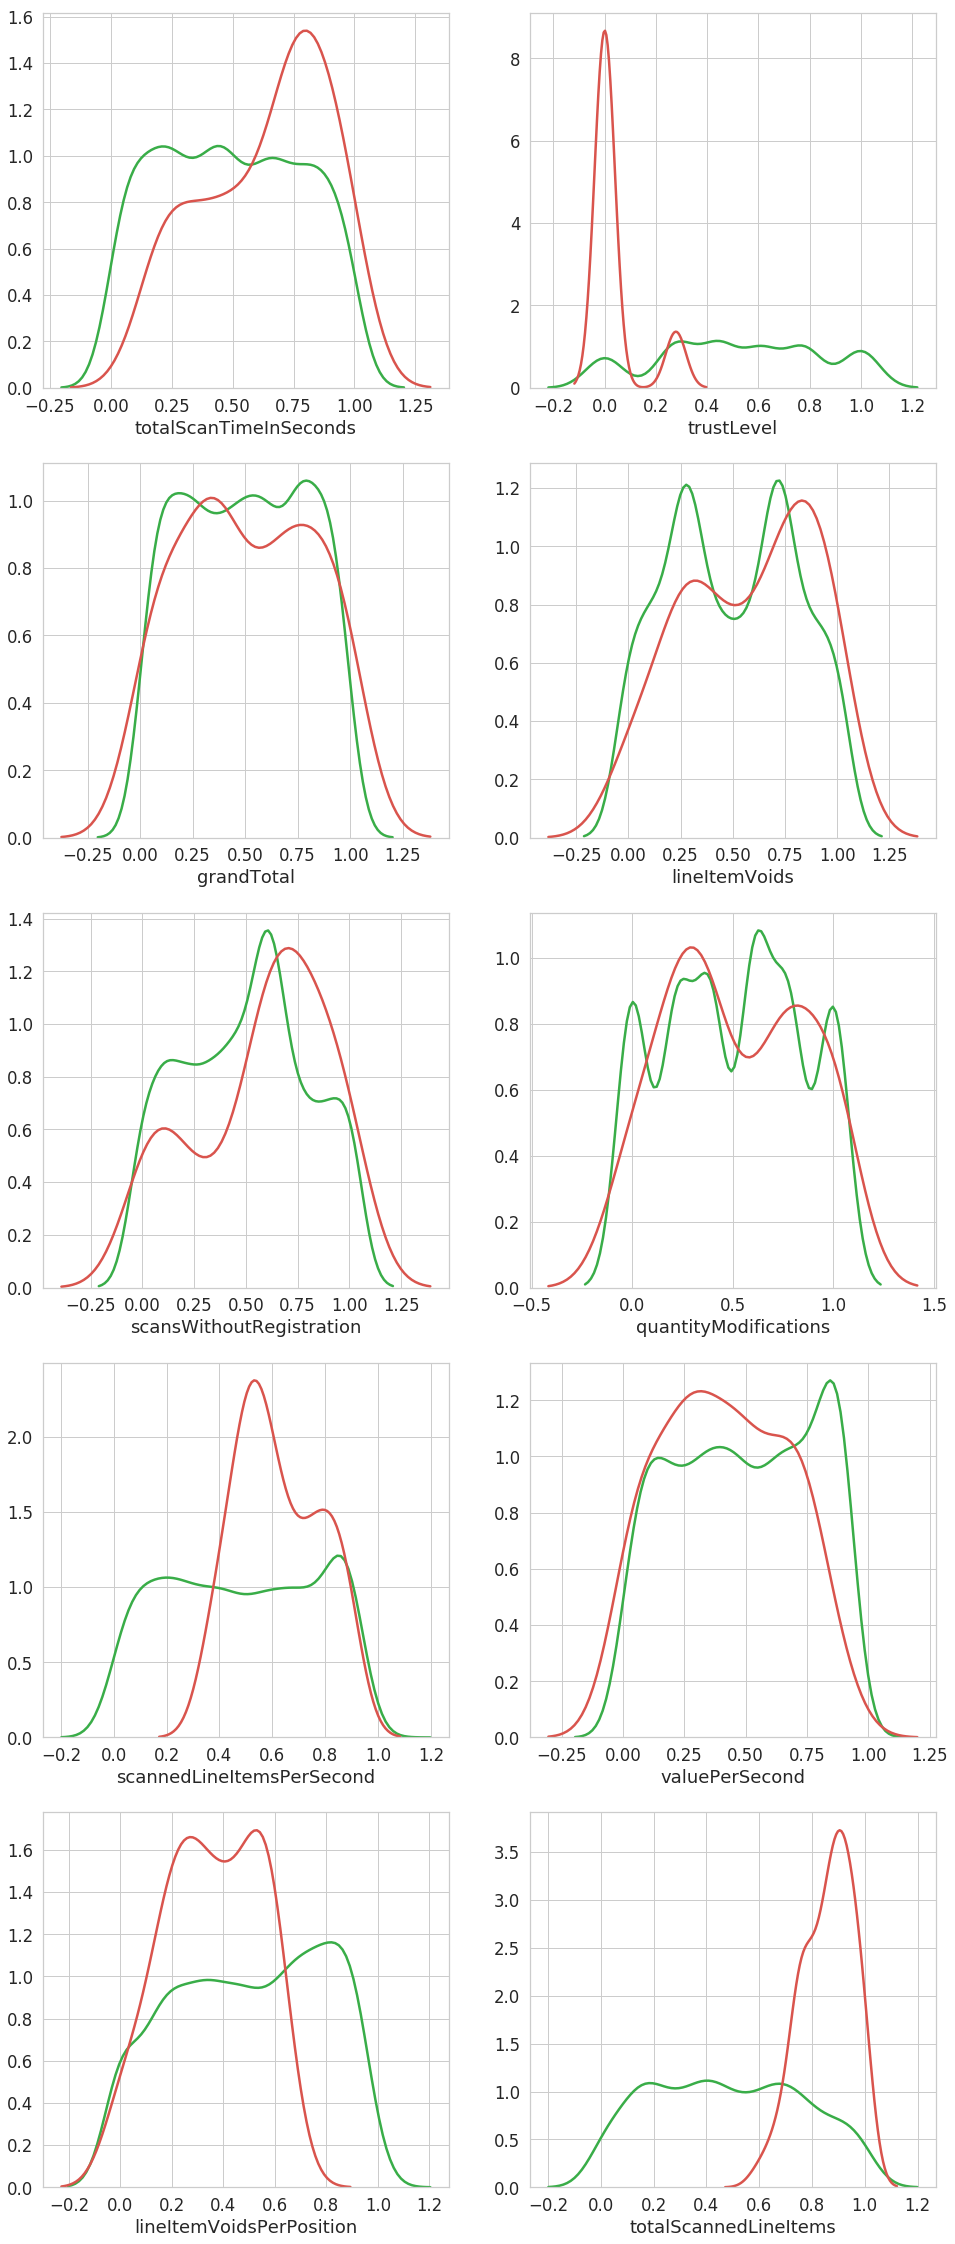

In [28]:
#fig, axs = plt.subplots(ncols=2, nrows=10,figsize=(20, 100))
fig, axs = plt.subplots(ncols=2, nrows=5,figsize=(16, 40))

n_fraud_color = sns.xkcd_rgb["medium green"]
fraud_color = sns.xkcd_rgb["pale red"]
#sns.plt.show()
sns.distplot(df_transformed.totalScanTimeInSeconds[df_transformed.fraud == 0], color=n_fraud_color,hist=False,ax=axs[0][0])
sns.distplot(df_transformed.totalScanTimeInSeconds[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[0][0])

sns.distplot(df_transformed.trustLevel[df_transformed.fraud == 0],color=n_fraud_color,hist=False,ax=axs[0][1])
sns.distplot(df_transformed.trustLevel[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[0][1])

sns.distplot(df_transformed.grandTotal[df_transformed.fraud == 0], color=n_fraud_color,hist=False,ax=axs[1][0])
sns.distplot(df_transformed.grandTotal[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[1][0])

sns.distplot(df_transformed.lineItemVoids[df_transformed.fraud == 0],color=n_fraud_color,hist=False,ax=axs[1][1])
sns.distplot(df_transformed.lineItemVoids[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[1][1])

sns.distplot(df_transformed.scansWithoutRegistration[df_transformed.fraud == 0], color=n_fraud_color,hist=False,ax=axs[2][0])
sns.distplot(df_transformed.scansWithoutRegistration[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[2][0])

sns.distplot(df_transformed.quantityModifications[df_transformed.fraud == 0],color=n_fraud_color,hist=False,ax=axs[2][1])
sns.distplot(df_transformed.quantityModifications[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[2][1])

sns.distplot(df_transformed.scannedLineItemsPerSecond[df_transformed.fraud == 0],color=n_fraud_color,hist=False,ax=axs[3][0])
sns.distplot(df_transformed.scannedLineItemsPerSecond[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[3][0])

sns.distplot(df_transformed.valuePerSecond[df_transformed.fraud == 0],color=n_fraud_color,hist=False,ax=axs[3][1])
sns.distplot(df_transformed.valuePerSecond[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[3][1])

sns.distplot(df_transformed.lineItemVoidsPerPosition[df_transformed.fraud == 0],color=n_fraud_color,hist=False,ax=axs[4][0])
sns.distplot(df_transformed.lineItemVoidsPerPosition[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[4][0])

sns.distplot(df_transformed.totalScannedLineItems[df_transformed.fraud == 0],color=n_fraud_color,hist=False,ax=axs[4][1])
sns.distplot(df_transformed.totalScannedLineItems[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[4][1])

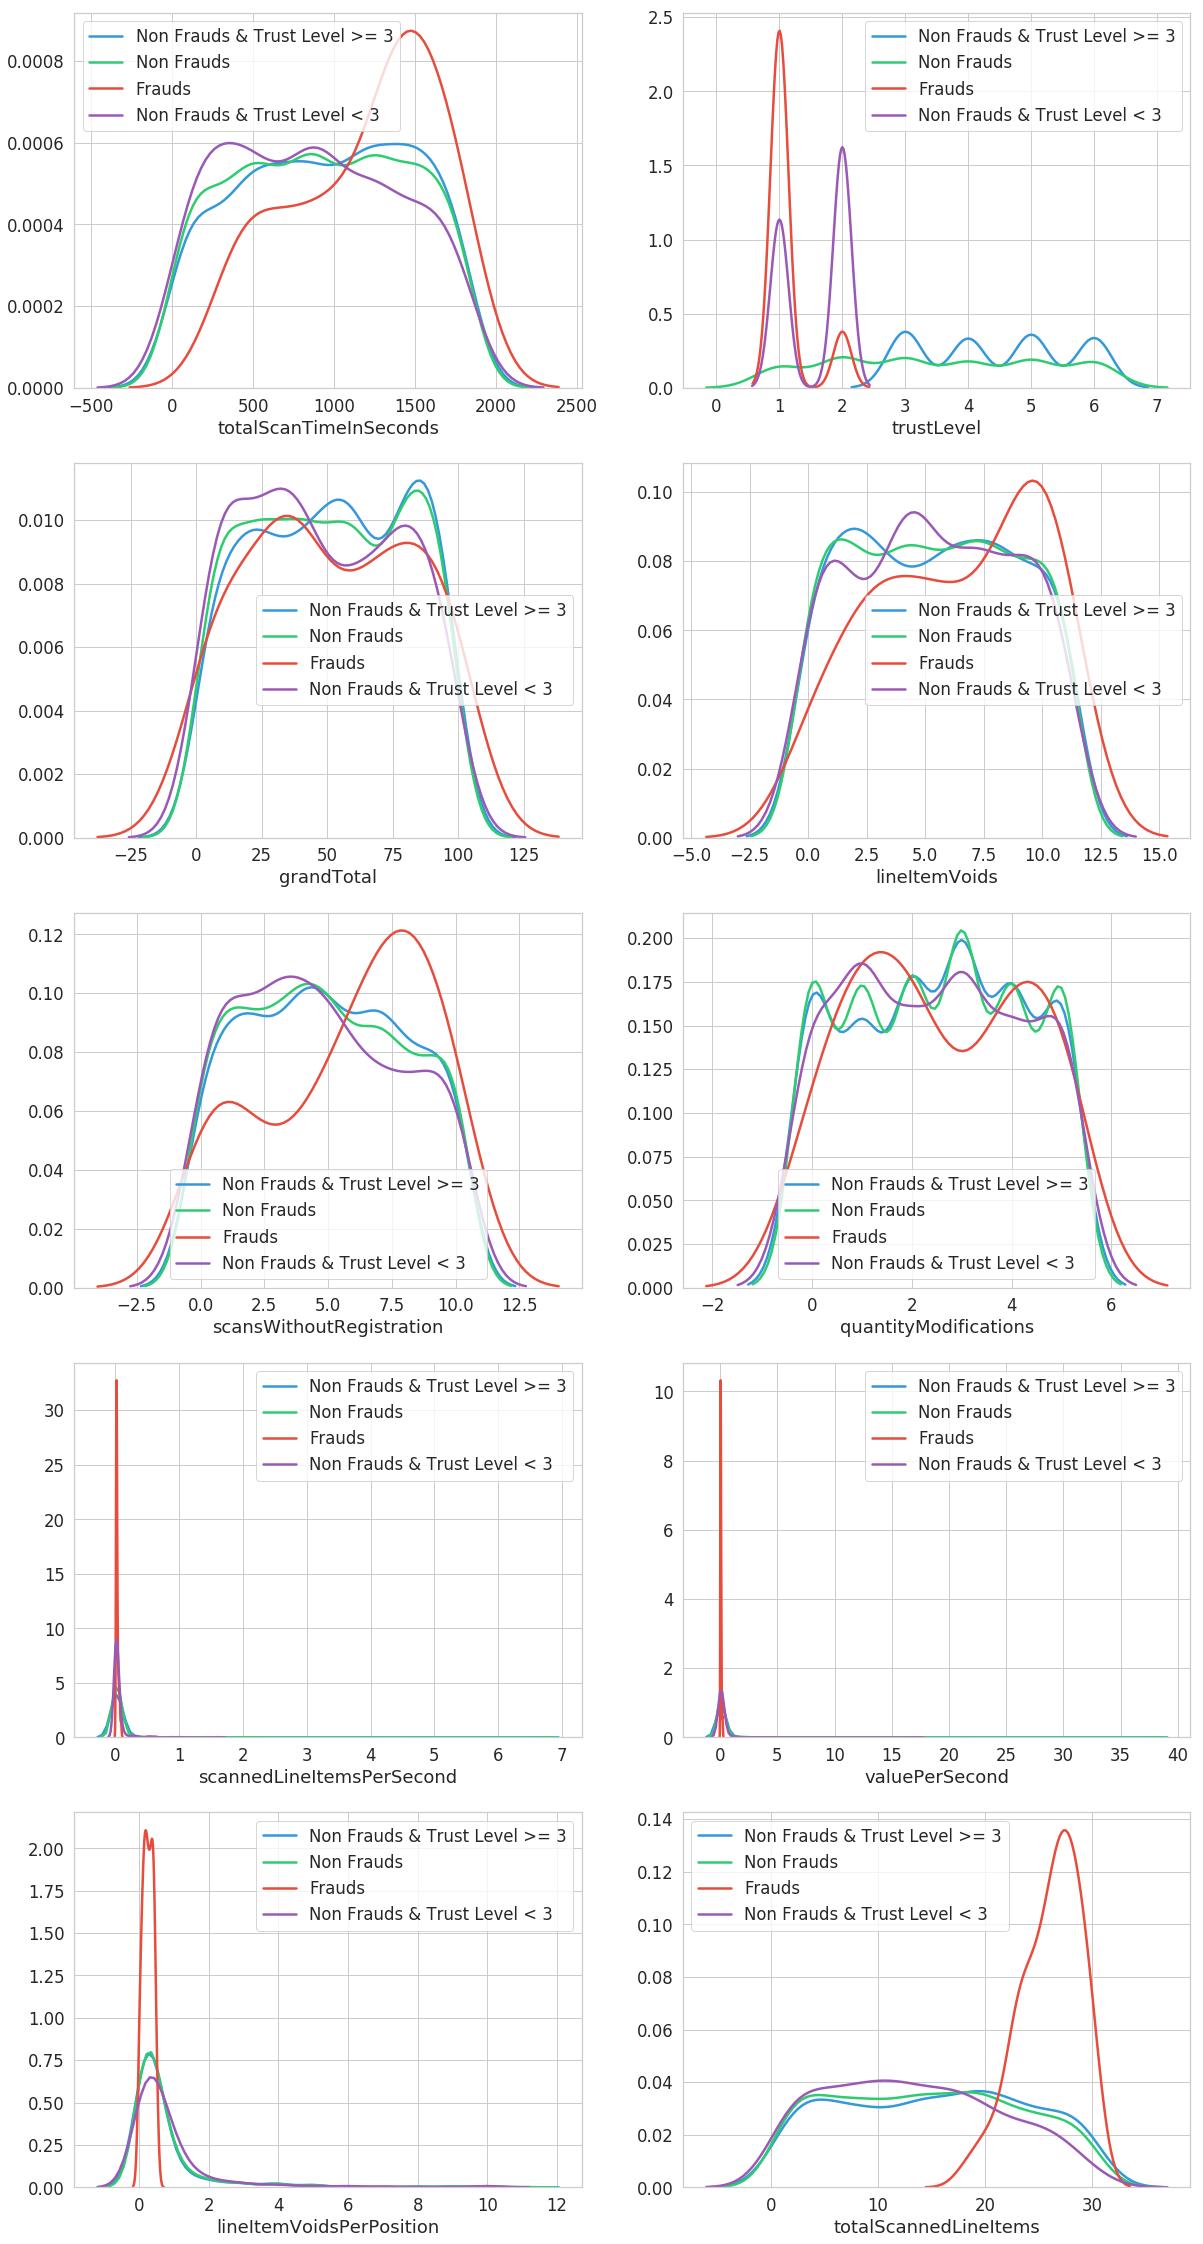

In [29]:
fig, axs = plt.subplots(ncols=2, nrows=5,figsize=(20, 40))

flatui = ["#9b59b6", "#3498db", "#e74c3c","#2ecc71"]
cp = sns.color_palette(flatui)
n_fraud_color = cp[3]
n_fraud_gt3_color = cp[1]
n_fraud_lt3_color = cp[0]
fraud_color = cp[2]

#sns.plt.show()
sns.distplot(df_train.totalScanTimeInSeconds[(df_train.fraud == 0)& (df_train.trustLevel >=3)], color=n_fraud_gt3_color,hist=False,ax=axs[0][0],label="Non Frauds & Trust Level >= 3")
sns.distplot(df_train.totalScanTimeInSeconds[df_train.fraud == 0], color=n_fraud_color,hist=False,ax=axs[0][0],label="Non Frauds")
sns.distplot(df_train.totalScanTimeInSeconds[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[0][0], label="Frauds")
sns.distplot(df_train.totalScanTimeInSeconds[(df_train.fraud == 0)& (df_train.trustLevel <3)], color=n_fraud_lt3_color,hist=False,ax=axs[0][0],label="Non Frauds & Trust Level < 3")


sns.distplot(df_train.trustLevel[(df_train.fraud == 0)& (df_train.trustLevel >=3)], color=n_fraud_gt3_color,hist=False,ax=axs[0][1],label="Non Frauds & Trust Level >= 3")
sns.distplot(df_train.trustLevel[df_train.fraud == 0], color=n_fraud_color,hist=False,ax=axs[0][1],label="Non Frauds")
sns.distplot(df_train.trustLevel[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[0][1], label="Frauds")
sns.distplot(df_train.trustLevel[(df_train.fraud == 0)& (df_train.trustLevel <3)], color=n_fraud_lt3_color,hist=False,ax=axs[0][1],label="Non Frauds & Trust Level < 3")


sns.distplot(df_train.grandTotal[(df_train.fraud == 0)& (df_train.trustLevel >=3)], color=n_fraud_gt3_color,hist=False,ax=axs[1][0],label="Non Frauds & Trust Level >= 3")
sns.distplot(df_train.grandTotal[df_train.fraud == 0], color=n_fraud_color,hist=False,ax=axs[1][0],label="Non Frauds")
sns.distplot(df_train.grandTotal[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[1][0], label="Frauds")
sns.distplot(df_train.grandTotal[(df_train.fraud == 0)& (df_train.trustLevel <3)], color=n_fraud_lt3_color,hist=False,ax=axs[1][0],label="Non Frauds & Trust Level < 3")

sns.distplot(df_train.lineItemVoids[(df_train.fraud == 0)& (df_train.trustLevel >=3)], color=n_fraud_gt3_color,hist=False,ax=axs[1][1],label="Non Frauds & Trust Level >= 3")
sns.distplot(df_train.lineItemVoids[df_train.fraud == 0], color=n_fraud_color,hist=False,ax=axs[1][1],label="Non Frauds")
sns.distplot(df_train.lineItemVoids[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[1][1], label="Frauds")
sns.distplot(df_train.lineItemVoids[(df_train.fraud == 0)& (df_train.trustLevel <3)], color=n_fraud_lt3_color,hist=False,ax=axs[1][1],label="Non Frauds & Trust Level < 3")

sns.distplot(df_train.scansWithoutRegistration[(df_train.fraud == 0)& (df_train.trustLevel >=3)], color=n_fraud_gt3_color,hist=False,ax=axs[2][0],label="Non Frauds & Trust Level >= 3")
sns.distplot(df_train.scansWithoutRegistration[df_train.fraud == 0], color=n_fraud_color,hist=False,ax=axs[2][0],label="Non Frauds")
sns.distplot(df_train.scansWithoutRegistration[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[2][0], label="Frauds")
sns.distplot(df_train.scansWithoutRegistration[(df_train.fraud == 0)& (df_train.trustLevel <3)], color=n_fraud_lt3_color,hist=False,ax=axs[2][0],label="Non Frauds & Trust Level < 3")

sns.distplot(df_train.quantityModifications[(df_train.fraud == 0)& (df_train.trustLevel >=3)], color=n_fraud_gt3_color,hist=False,ax=axs[2][1],label="Non Frauds & Trust Level >= 3")
sns.distplot(df_train.quantityModifications[df_train.fraud == 0], color=n_fraud_color,hist=False,ax=axs[2][1],label="Non Frauds")
sns.distplot(df_train.quantityModifications[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[2][1], label="Frauds")
sns.distplot(df_train.quantityModifications[(df_train.fraud == 0)& (df_train.trustLevel <3)], color=n_fraud_lt3_color,hist=False,ax=axs[2][1],label="Non Frauds & Trust Level < 3")

sns.distplot(df_train.scannedLineItemsPerSecond[(df_train.fraud == 0)& (df_train.trustLevel >=3)], color=n_fraud_gt3_color,hist=False,ax=axs[3][0],label="Non Frauds & Trust Level >= 3")
sns.distplot(df_train.scannedLineItemsPerSecond[df_train.fraud == 0], color=n_fraud_color,hist=False,ax=axs[3][0],label="Non Frauds")
sns.distplot(df_train.scannedLineItemsPerSecond[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[3][0], label="Frauds")
sns.distplot(df_train.scannedLineItemsPerSecond[(df_train.fraud == 0)& (df_train.trustLevel <3)], color=n_fraud_lt3_color,hist=False,ax=axs[3][0],label="Non Frauds & Trust Level < 3")

sns.distplot(df_train.valuePerSecond[(df_train.fraud == 0)& (df_train.trustLevel >=3)], color=n_fraud_gt3_color,hist=False,ax=axs[3][1],label="Non Frauds & Trust Level >= 3")
sns.distplot(df_train.valuePerSecond[df_train.fraud == 0], color=n_fraud_color,hist=False,ax=axs[3][1],label="Non Frauds")
sns.distplot(df_train.valuePerSecond[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[3][1], label="Frauds")
sns.distplot(df_train.valuePerSecond[(df_train.fraud == 0)& (df_train.trustLevel <3)], color=n_fraud_lt3_color,hist=False,ax=axs[3][1],label="Non Frauds & Trust Level < 3")

sns.distplot(df_train.lineItemVoidsPerPosition[(df_train.fraud == 0)& (df_train.trustLevel >=3)], color=n_fraud_gt3_color,hist=False,ax=axs[4][0],label="Non Frauds & Trust Level >= 3")
sns.distplot(df_train.lineItemVoidsPerPosition[df_train.fraud == 0], color=n_fraud_color,hist=False,ax=axs[4][0],label="Non Frauds")
sns.distplot(df_train.lineItemVoidsPerPosition[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[4][0], label="Frauds")
sns.distplot(df_train.lineItemVoidsPerPosition[(df_train.fraud == 0)& (df_train.trustLevel <3)], color=n_fraud_lt3_color,hist=False,ax=axs[4][0],label="Non Frauds & Trust Level < 3")

sns.distplot(df_train.totalScannedLineItems[(df_train.fraud == 0)& (df_train.trustLevel >=3)], color=n_fraud_gt3_color,hist=False,ax=axs[4][1],label="Non Frauds & Trust Level >= 3")
sns.distplot(df_train.totalScannedLineItems[df_train.fraud == 0], color=n_fraud_color,hist=False,ax=axs[4][1],label="Non Frauds")
sns.distplot(df_train.totalScannedLineItems[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[4][1], label="Frauds")
sns.distplot(df_train.totalScannedLineItems[(df_train.fraud == 0)& (df_train.trustLevel <3)], color=n_fraud_lt3_color,hist=False,ax=axs[4][1],label="Non Frauds & Trust Level < 3")


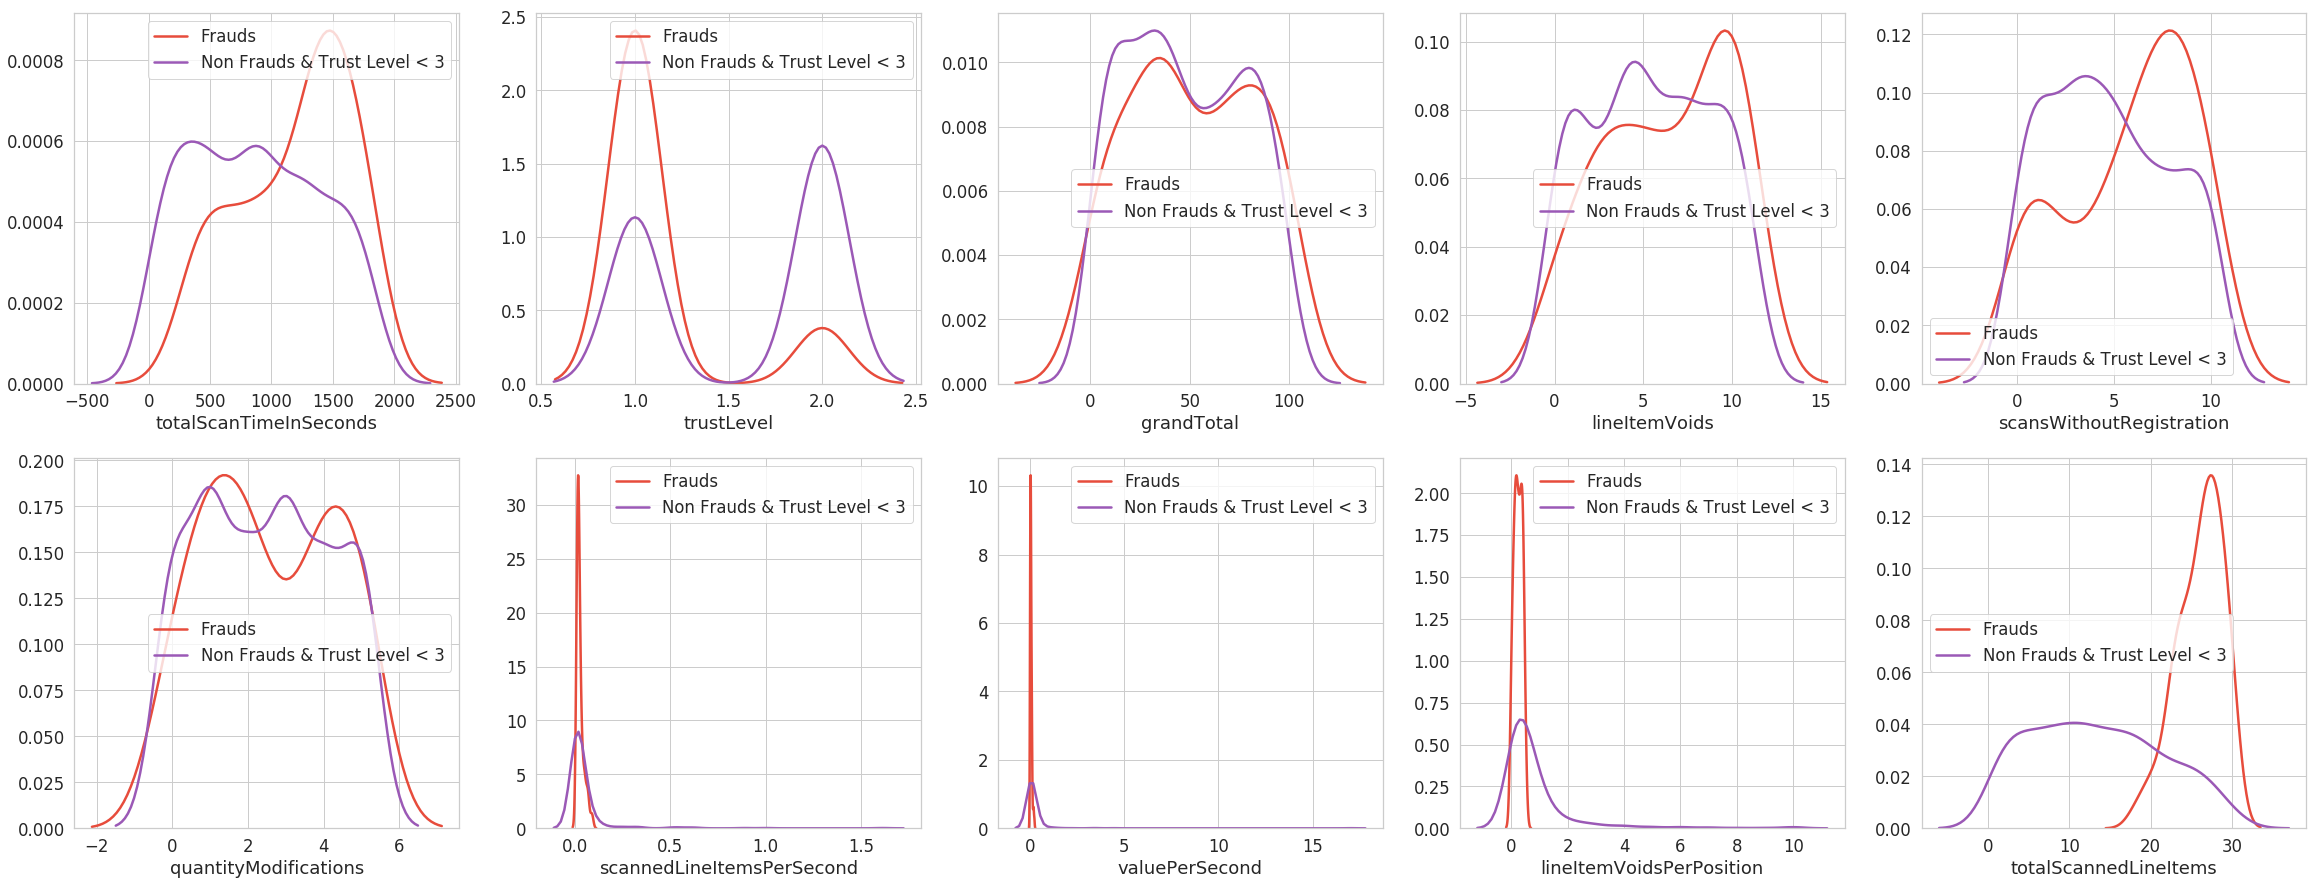

In [30]:
fig, axs = plt.subplots(ncols=5, nrows=2,figsize=(40, 15))

flatui = ["#9b59b6", "#3498db", "#e74c3c","#2ecc71"]
cp = sns.color_palette(flatui)
n_fraud_color = cp[3]
n_fraud_gt3_color = cp[1]
n_fraud_lt3_color = cp[0]
fraud_color = cp[2]


sns.distplot(df_train.totalScanTimeInSeconds[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[0][0], label="Frauds")
sns.distplot(df_train.totalScanTimeInSeconds[(df_train.fraud == 0)& (df_train.trustLevel <3)], color=n_fraud_lt3_color,hist=False,ax=axs[0][0],label="Non Frauds & Trust Level < 3")



sns.distplot(df_train.trustLevel[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[0][1], label="Frauds")
sns.distplot(df_train.trustLevel[(df_train.fraud == 0)& (df_train.trustLevel <3)], color=n_fraud_lt3_color,hist=False,ax=axs[0][1],label="Non Frauds & Trust Level < 3")



sns.distplot(df_train.grandTotal[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[0][2], label="Frauds")
sns.distplot(df_train.grandTotal[(df_train.fraud == 0)& (df_train.trustLevel <3)], color=n_fraud_lt3_color,hist=False,ax=axs[0][2],label="Non Frauds & Trust Level < 3")

sns.distplot(df_train.lineItemVoids[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[0][3], label="Frauds")
sns.distplot(df_train.lineItemVoids[(df_train.fraud == 0)& (df_train.trustLevel <3)], color=n_fraud_lt3_color,hist=False,ax=axs[0][3],label="Non Frauds & Trust Level < 3")


sns.distplot(df_train.scansWithoutRegistration[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[0][4], label="Frauds")
sns.distplot(df_train.scansWithoutRegistration[(df_train.fraud == 0)& (df_train.trustLevel <3)], color=n_fraud_lt3_color,hist=False,ax=axs[0][4],label="Non Frauds & Trust Level < 3")


sns.distplot(df_train.quantityModifications[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[1][0], label="Frauds")
sns.distplot(df_train.quantityModifications[(df_train.fraud == 0)& (df_train.trustLevel <3)], color=n_fraud_lt3_color,hist=False,ax=axs[1][0],label="Non Frauds & Trust Level < 3")


sns.distplot(df_train.scannedLineItemsPerSecond[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[1][1], label="Frauds")
sns.distplot(df_train.scannedLineItemsPerSecond[(df_train.fraud == 0)& (df_train.trustLevel <3)], color=n_fraud_lt3_color,hist=False,ax=axs[1][1],label="Non Frauds & Trust Level < 3")


sns.distplot(df_train.valuePerSecond[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[1][2], label="Frauds")
sns.distplot(df_train.valuePerSecond[(df_train.fraud == 0)& (df_train.trustLevel <3)], color=n_fraud_lt3_color,hist=False,ax=axs[1][2],label="Non Frauds & Trust Level < 3")


sns.distplot(df_train.lineItemVoidsPerPosition[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[1][3], label="Frauds")
sns.distplot(df_train.lineItemVoidsPerPosition[(df_train.fraud == 0)& (df_train.trustLevel <3)], color=n_fraud_lt3_color,hist=False,ax=axs[1][3],label="Non Frauds & Trust Level < 3")


sns.distplot(df_train.totalScannedLineItems[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[1][4], label="Frauds")
sns.distplot(df_train.totalScannedLineItems[(df_train.fraud == 0)& (df_train.trustLevel <3)], color=n_fraud_lt3_color,hist=False,ax=axs[1][4],label="Non Frauds & Trust Level < 3")


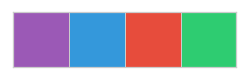

In [31]:
flatui = ["#9b59b6", "#3498db", "#e74c3c","#2ecc71"]
sns.palplot(sns.color_palette(flatui))

In [80]:
df_train[df_train.fraud == 0][["totalScannedLineItems"]].groupby("totalScannedLineItems").agg("count")

Empty DataFrame
Columns: []
Index: [0.9999999999999959, 0.9999999999999973, 0.9999999999999976, 0.9999999999999978, 0.999999999999998, 0.9999999999999986, 0.9999999999999989, 0.999999999999999, 0.9999999999999993, 0.9999999999999994, 0.9999999999999996, 0.9999999999999997, 0.9999999999999998, 0.9999999999999999, 1.0, 1.0000000000000002, 1.0000000000000004, 1.0000000000000007, 1.0000000000000013, 1.0000000000000016, 1.000000000000002, 1.0000000000000022, 1.000000000000003, 1.0000000000000033, 1.9999999999999922, 1.999999999999993, 1.9999999999999933, 1.9999999999999944, 1.9999999999999958, 1.999999999999997, 1.9999999999999971, 1.9999999999999973, 1.9999999999999978, 1.999999999999998, 1.9999999999999982, 1.9999999999999984, 1.9999999999999987, 1.999999999999999, 1.9999999999999991, 1.9999999999999993, 1.9999999999999996, 1.9999999999999998, 2.0, 2.0000000000000004, 2.000000000000001, 2.0000000000000013, 2.0000000000000018, 2.0000000000000027, 2.000000000000003, 2.0000000000000036, 2.000000000000004, 2.0000000000000044, 2.0000000000000058, 2.000000000000006, 2.9999999999999933, 2.9999999999999942, 2.9999999999999947, 2.9999999999999956, 2.9999999999999964, 2.999999999999997, 2.999999999999998, 2.9999999999999982, 2.9999999999999987, 2.999999999999999, 2.9999999999999996, 3.0, 3.0000000000000004, 3.000000000000001, 3.0000000000000013, 3.0000000000000018, 3.0000000000000027, 3.000000000000003, 3.0000000000000036, 3.0000000000000044, 3.000000000000005, 3.0000000000000053, 3.0000000000000058, 3.000000000000006, 3.000000000000008, 3.0000000000000084, 3.9999999999999845, 3.99999999999999, 3.9999999999999925, 3.999999999999993, 3.9999999999999933, 3.9999999999999947, 3.9999999999999956, 3.999999999999996, 3.9999999999999964, 3.999999999999997, 3.9999999999999973, 3.999999999999998, 3.9999999999999982, 3.9999999999999987, 3.999999999999999, 3.9999999999999996, 4.0, 4.000000000000001, 4.000000000000002, 4.000000000000003, ...]

[722 rows x 0 columns]

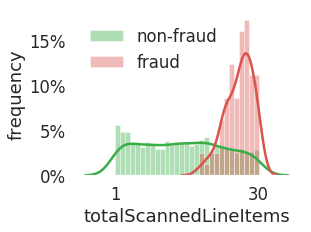

In [100]:
#fig, axs = plt.subplots(ncols=2, nrows=10,figsize=(20, 100))

fig, ax = plt.subplots(figsize=(4,3))
n_fraud_color = sns.xkcd_rgb["medium green"]
fraud_color = sns.xkcd_rgb["pale red"]
sns.distplot(df_train.totalScannedLineItems[df_train.fraud == 0],color=n_fraud_color,hist=True, bins=29, label="non-fraud")
sns.distplot(df_train.totalScannedLineItems[df_train.fraud == 1], color=fraud_color,hist=True, bins=12, label="fraud")
ax.grid(False)
ax.set_facecolor('#ffffff')
ax.set(xlabel='totalScannedLineItems', ylabel='frequency',title='')
ax.legend(frameon=False)
#ax.set_yticks([0,0.15])
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
ax.set_xticks([1,30])
fig.savefig('totalScannedLineItems.svg', bbox_inches='tight', pad_inches=0)
plt.show()